In [20]:
from gurobipy import Model, GRB, quicksum

# Create a new model
m = Model("message_spread")

# Define the nodes and edges of the graph
nodes = ['David', 'Mark', 'Logan', 'Lincoln', 'Samson', 'Tony', 'Alexi', 'Simba', 'Mufasa']
edges = [
    ('David', 'Mark'), ('David', 'Logan'), ('David', 'Lincoln'), ('David', 'Samson'), ('David', 'Tony'), ('David', 'Alexi'),
    ('Mark', 'Logan'), ('Logan', 'Lincoln'), ('Logan', 'Alexi'), ('Lincoln', 'Samson'), ('Samson', 'Tony'), ('Tony', 'Alexi'),
    ('Lincoln', 'Simba'), ('Alexi', 'Mufasa')
]

# Create variables for each node and each player's capture
simba_capture = m.addVars(nodes, vtype=GRB.BINARY, name="SimbaCapture")
mufasa_capture = m.addVars(nodes, vtype=GRB.BINARY, name="MufasaCapture")

# Ensure a node can be captured by only one player
for node in nodes:
    m.addConstr(simba_capture[node] + mufasa_capture[node] <= 1, name=f"OneCapture_{node}")

# Initial conditions: Simba starts at Simba, Mufasa starts at Mufasa
m.addConstr(simba_capture['Simba'] == 1, name="SimbaStart")
m.addConstr(mufasa_capture['Mufasa'] == 1, name="MufasaStart")

# Spread constraints: A message can only spread to connected nodes
for u, v in edges:
    m.addConstr(simba_capture[v] >= simba_capture[u], name=f"SimbaSpread_{u}_{v}")
    m.addConstr(mufasa_capture[v] >= mufasa_capture[u], name=f"MufasaSpread_{u}_{v}")

# Objective: Maximize the number of nodes captured by both players
m.setObjective(quicksum(simba_capture[node] for node in nodes) + quicksum(mufasa_capture[node] for node in nodes), GRB.MAXIMIZE)

# Optimize the model
m.optimize()

# Check if the model is optimized successfully
if m.status == GRB.INFEASIBLE:
    print("Model is infeasible")
    # Perform infeasibility analysis
    m.computeIIS()
    m.write("model.ilp")
    for c in m.getConstrs():
        if c.IISConstr:
            print(f"Infeasible constraint: {c.constrName}")

else:
    print("Simba's captured nodes:")
    for node in nodes:
        if simba_capture[node].x > 0.5:  # Accessing the optimized value of the variable
            print(node)

    print("\nMufasa's captured nodes:")
    for node in nodes:
        if mufasa_capture[node].x > 0.5:  # Accessing the optimized value of the variable
            print(node)


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) Silver 4210 CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 20 physical cores, 40 logical processors, using up to 20 threads

Optimize a model with 39 rows, 18 columns and 76 nonzeros
Model fingerprint: 0xb7ef2276
Variable types: 0 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 39 rows and 18 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 40 available processors)

Solution count 2: 5 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000000000000e+00, gap 0.0000%
Simba's captured nodes:
Si

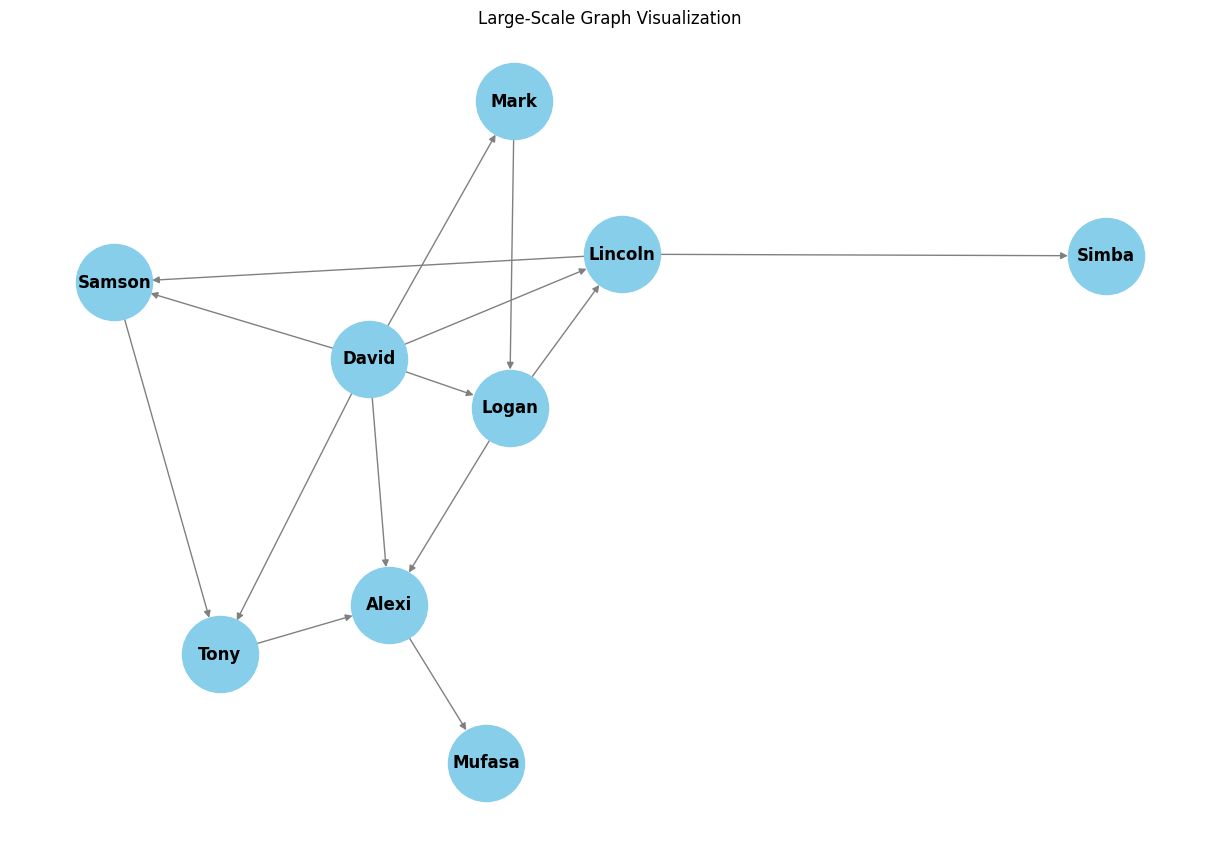

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the nodes and edges of the graph
nodes = ['David', 'Mark', 'Logan', 'Lincoln', 'Samson', 'Tony', 'Alexi', 'Simba', 'Mufasa']
edges = [
    ('David', 'Mark'), ('David', 'Logan'), ('David', 'Lincoln'), ('David', 'Samson'), ('David', 'Tony'), ('David', 'Alexi'),
    ('Mark', 'Logan'), ('Logan', 'Lincoln'), ('Logan', 'Alexi'), ('Lincoln', 'Samson'), ('Samson', 'Tony'), ('Tony', 'Alexi'),
    ('Lincoln', 'Simba'), ('Alexi', 'Mufasa')
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions for each node
pos = nx.spring_layout(G)  # You can try different layouts like spring_layout, circular_layout, etc.

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# Show the plot
plt.title('Large-Scale Graph Visualization')
plt.show()


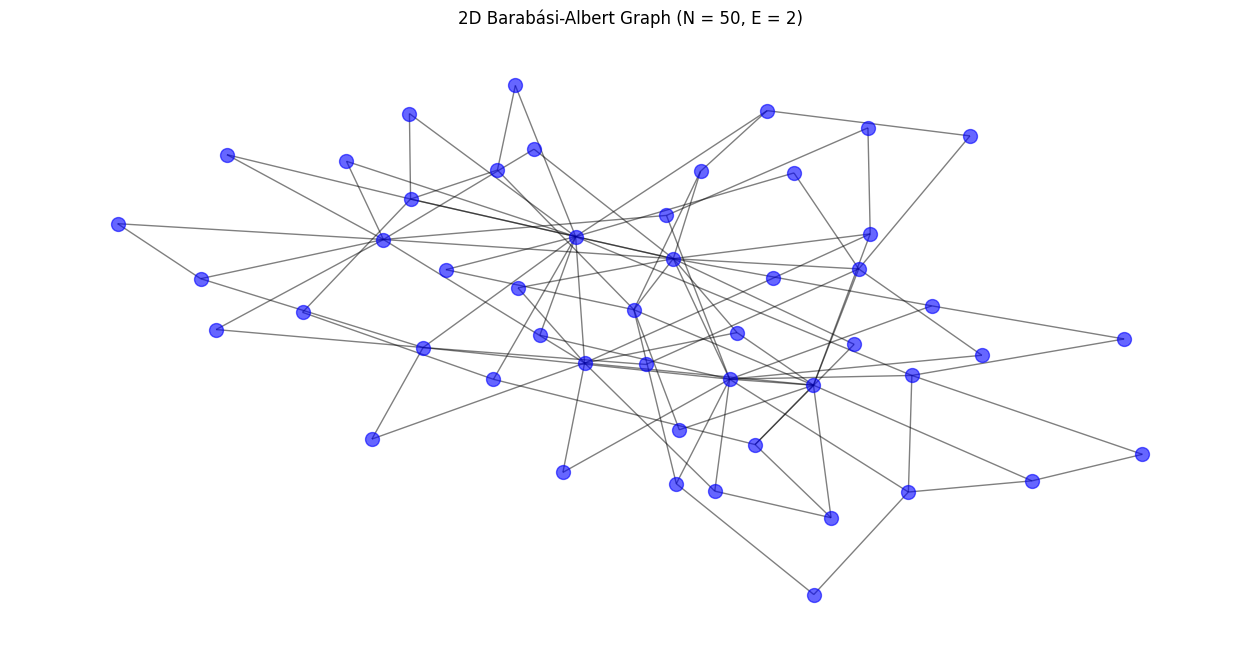

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters for the Barabási-Albert graph
num_nodes = 50  # Number of nodes
num_edges_to_attach = 2  # Number of edges to attach from a new node to existing nodes

# Generate a Barabási-Albert graph
G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)

# Set up the figure
plt.figure(figsize=(16, 8))

# Generate positions for each node in 2D space
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', alpha=0.6)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels (optional)
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Set plot title and show the plot
plt.title("2D Barabási-Albert Graph (N = 50, E = 2)")
plt.axis('off')  # Turn off axis labels
plt.show()




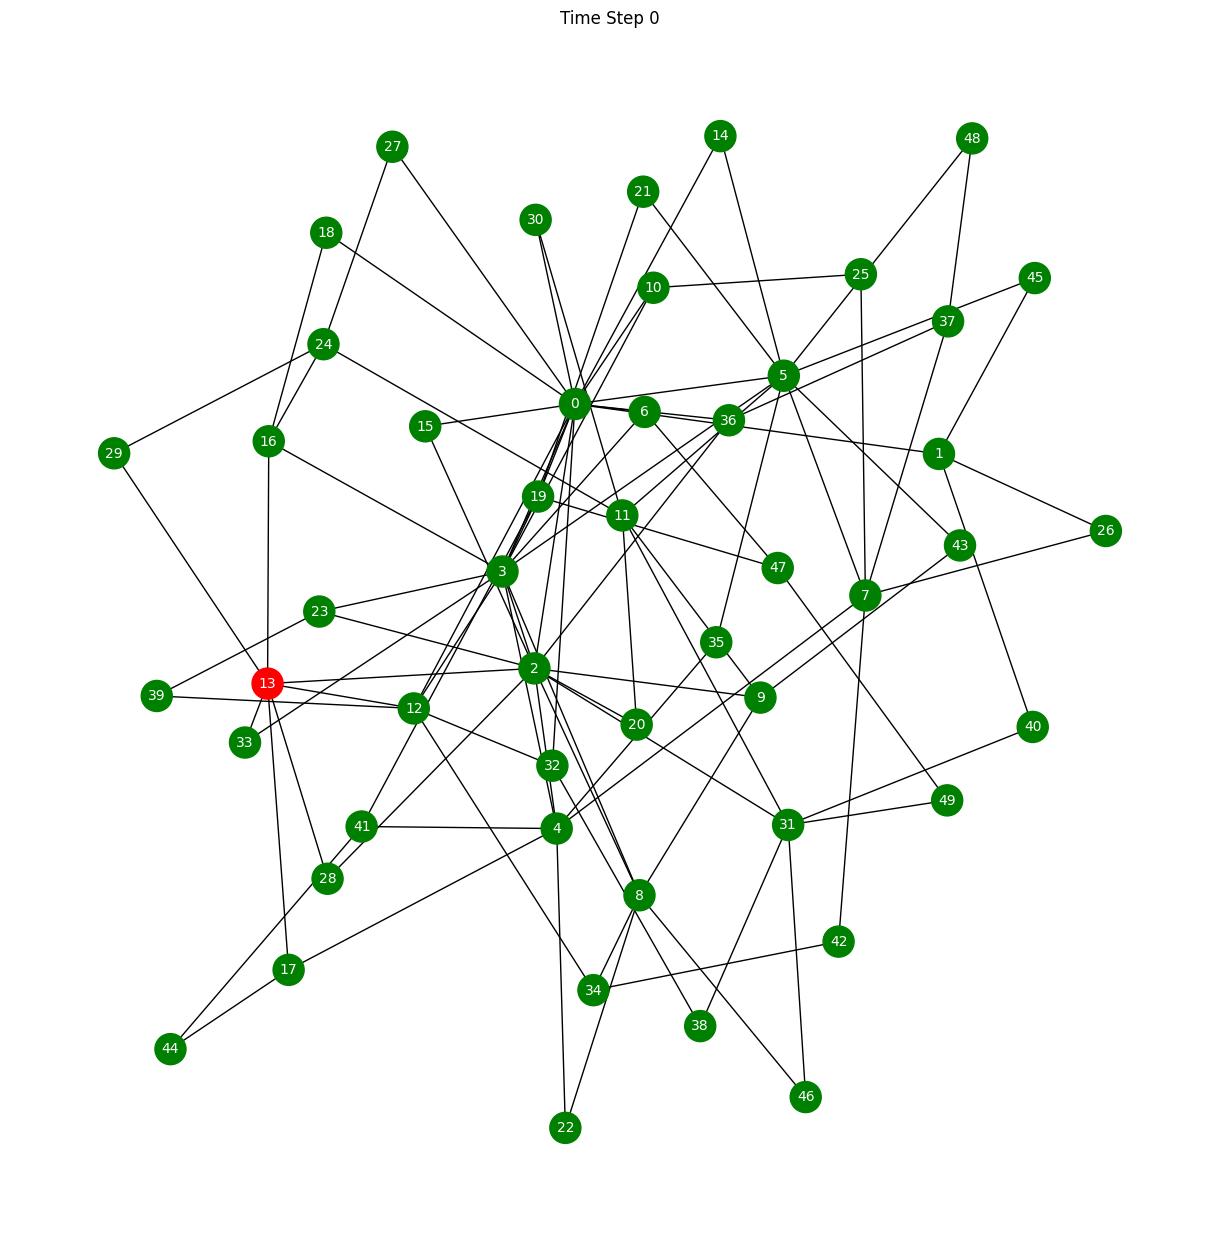

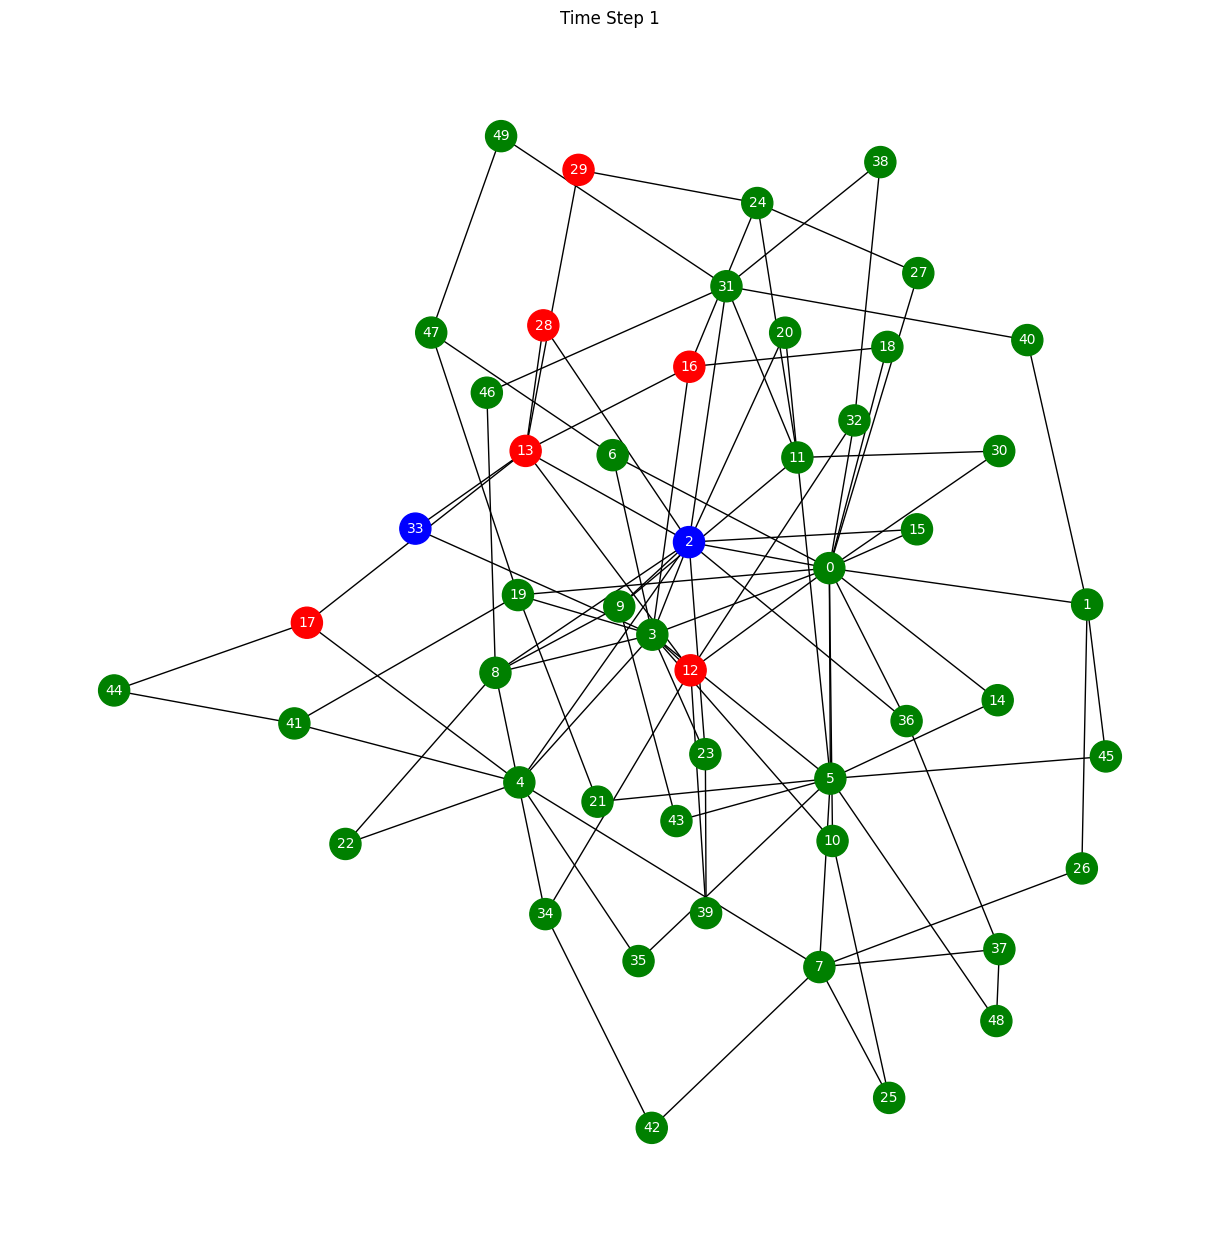

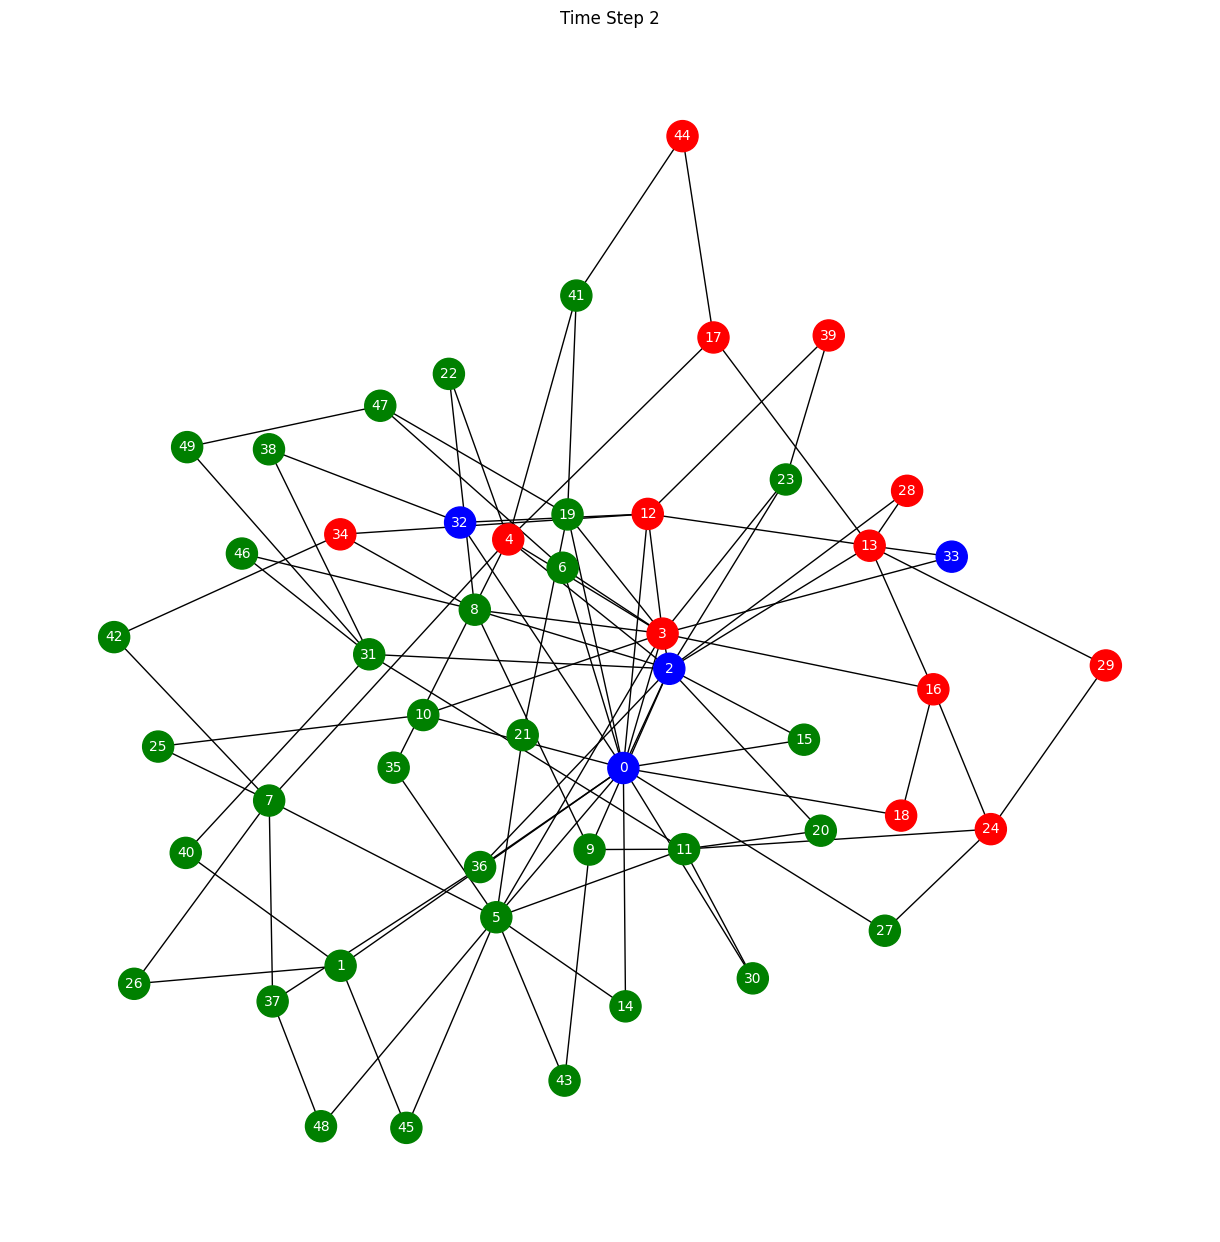

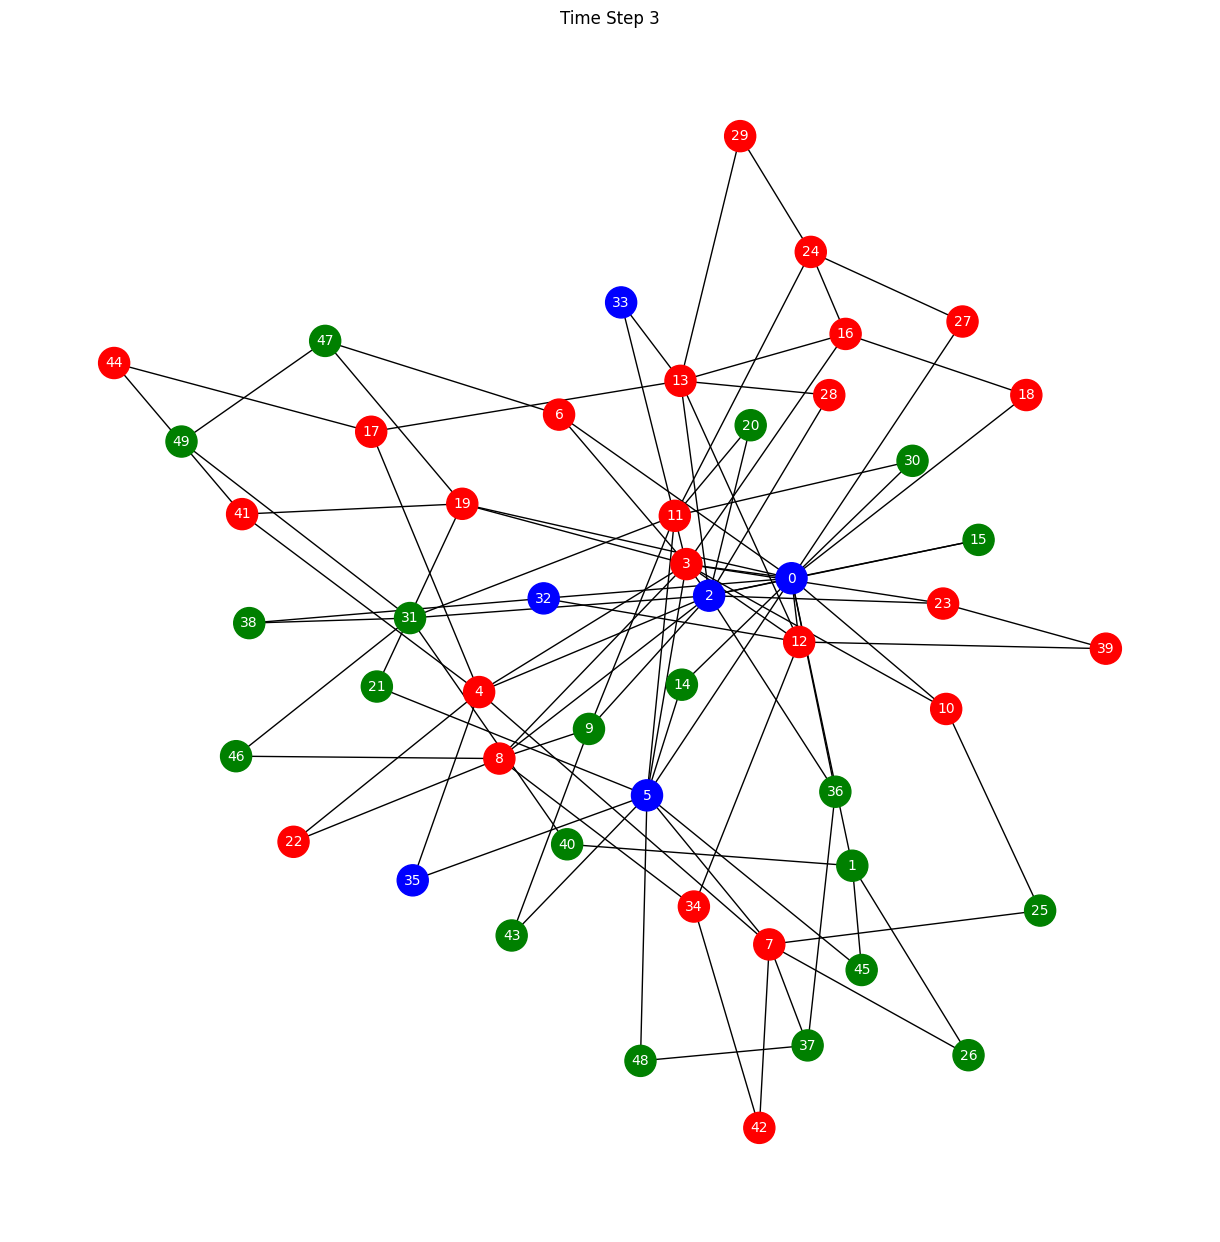

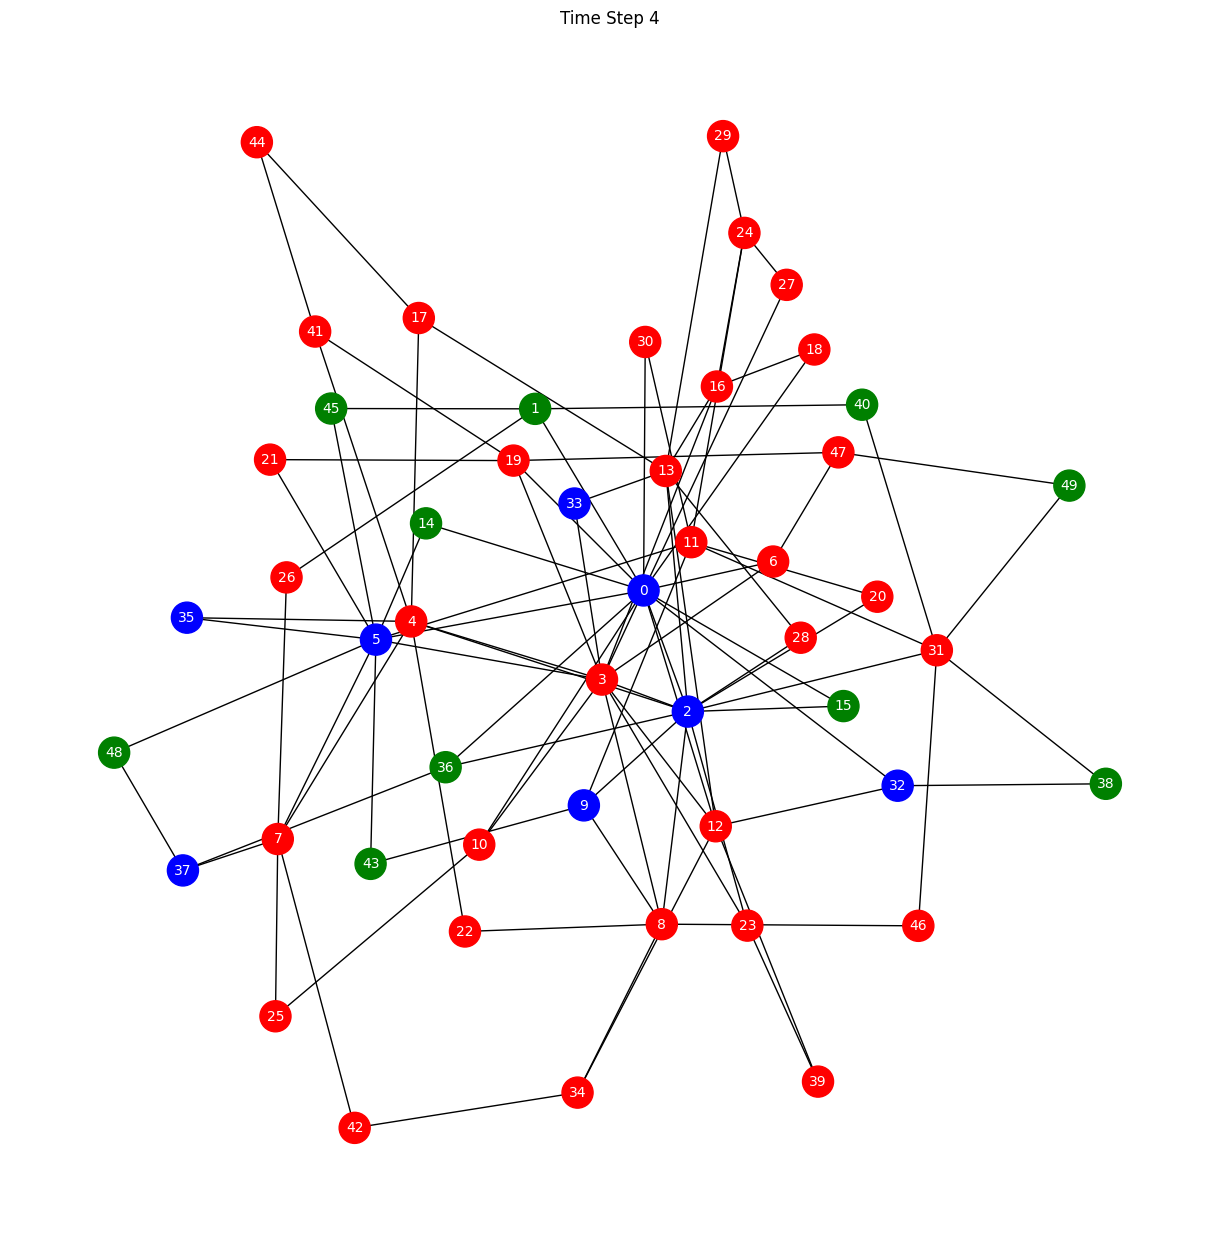

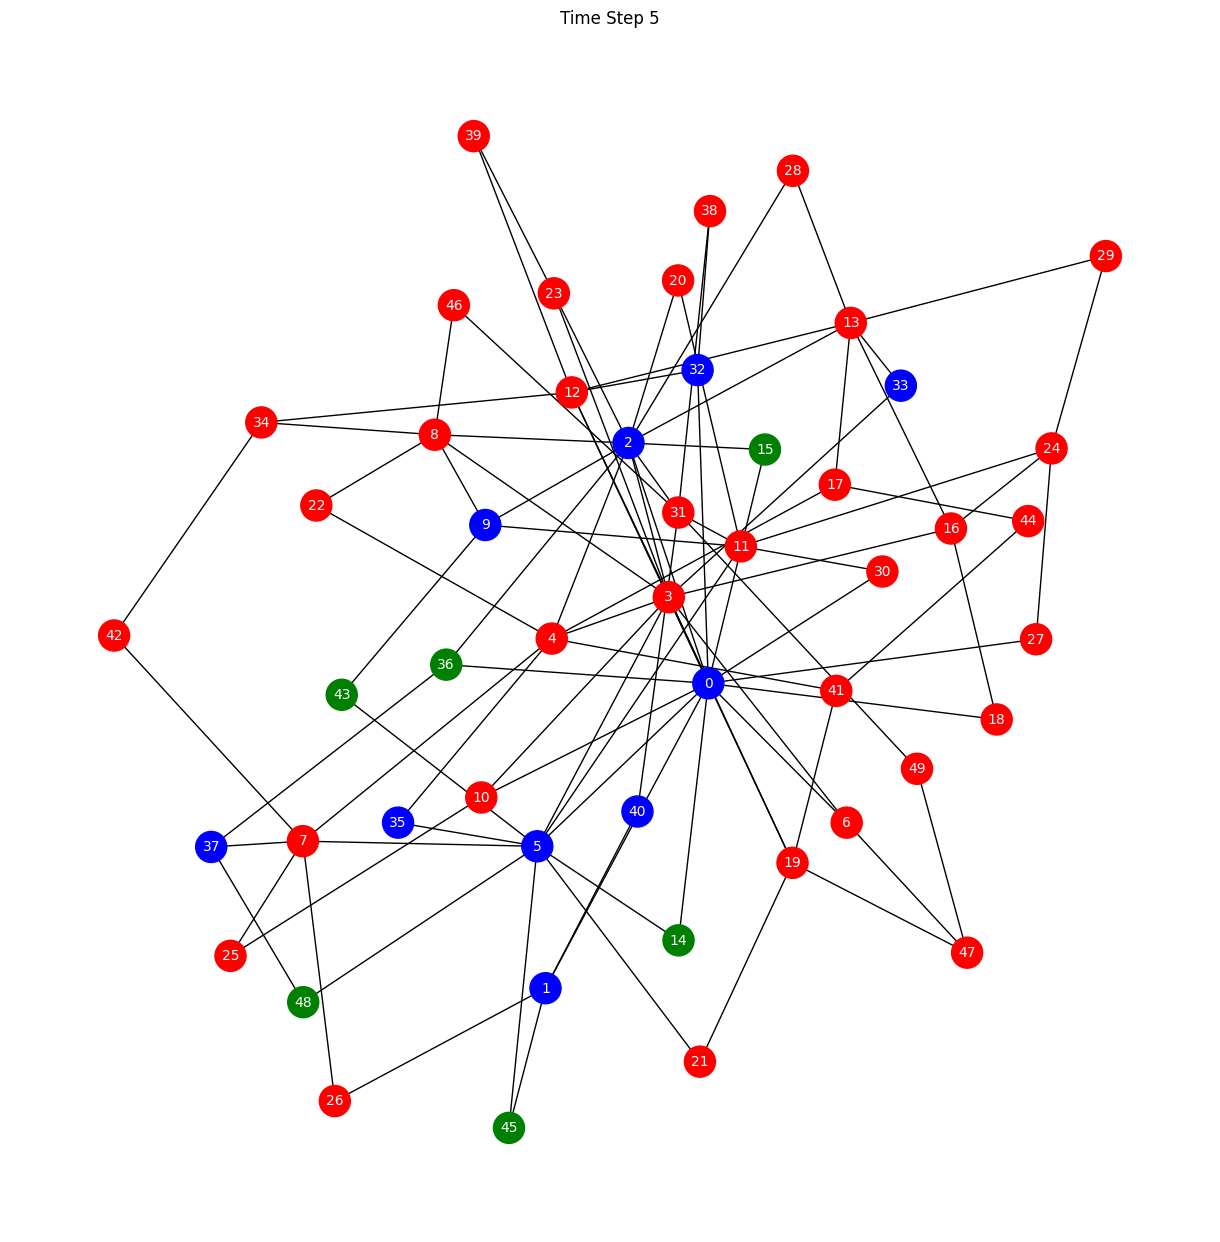

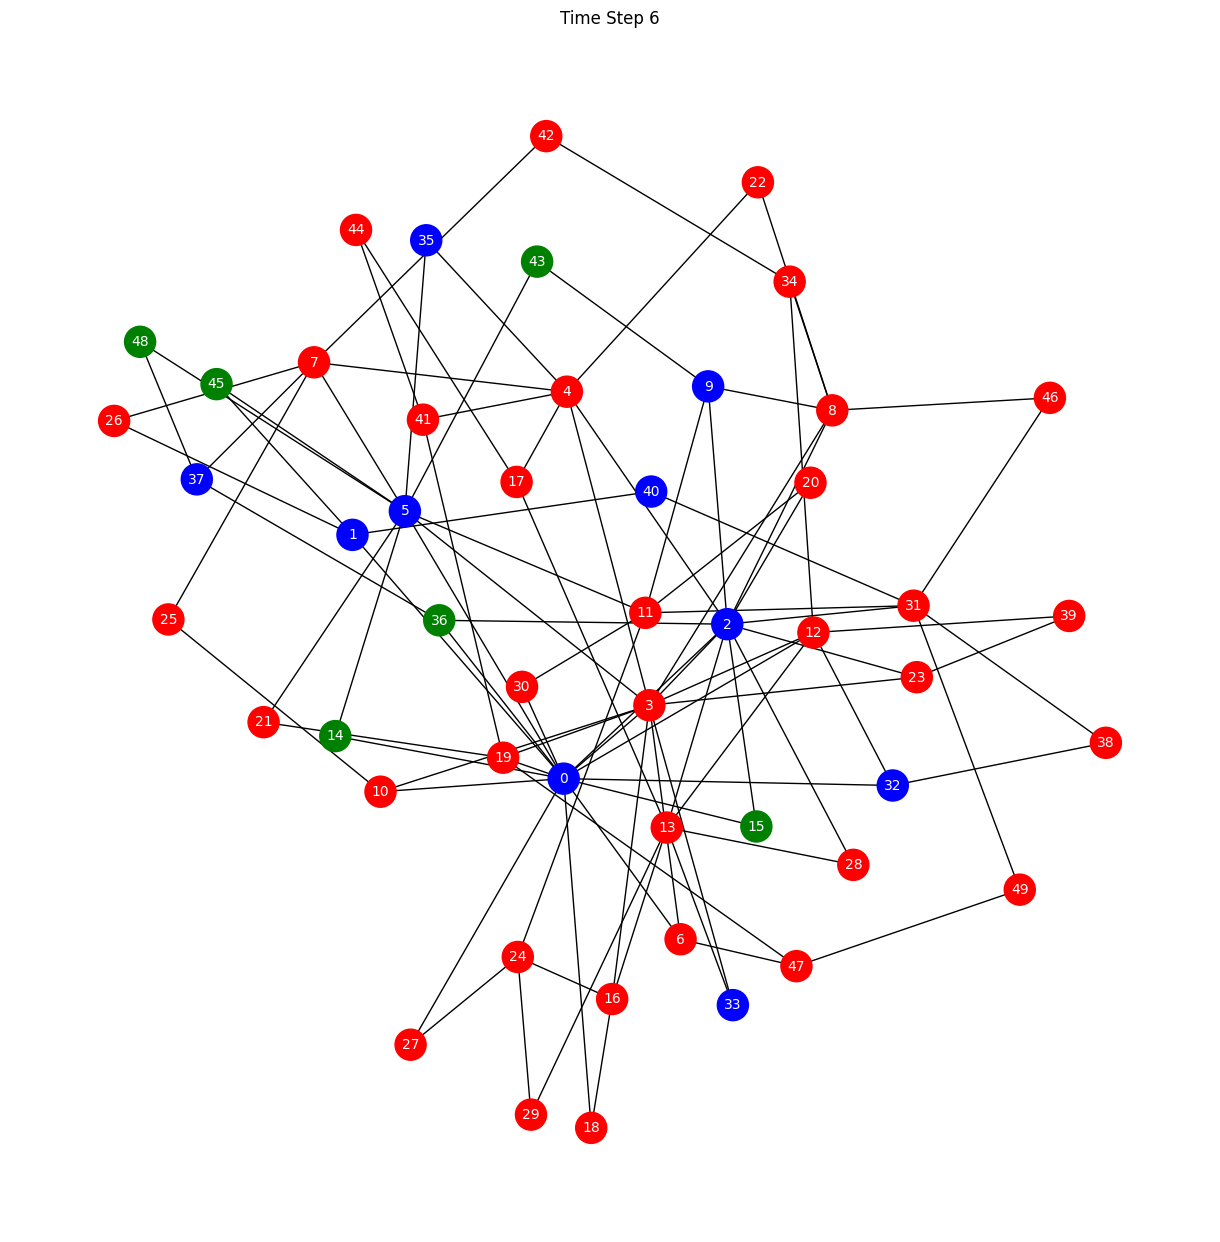

Final Protected Vertices: {0, 33, 2, 32, 35, 5, 37, 1, 40, 9}
Final Burning Vertices: {3, 4, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 38, 39, 41, 42, 44, 46, 47, 49}


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def visualize_graph(graph, burning, protected, time_step):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 12))
    
    node_colors = []
    for node in graph.nodes():
        if node in burning:
            node_colors.append('red')
        elif node in protected:
            node_colors.append('blue')
        else:
            node_colors.append('green')
    
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='white')
    plt.title(f"Time Step {time_step}")
    plt.show()

def firefighter_problem(graph, start_vertex, num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    visualize_graph(graph, burning, protected, time_step)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        new_protected = set()
        for _ in range(num_firefighters):
            if new_burning:
                vertex_to_protect = new_burning.pop()
                new_protected.add(vertex_to_protect)
                burning.remove(vertex_to_protect)
            else:
                break

        protected.update(new_protected)
        time_step += 1

        visualize_graph(graph, burning, protected, time_step)

        if not new_burning:
            break

    return protected, burning

# Example usage: Random graph with 30 nodes
#G = nx.gnp_random_graph(30, 0.2)

# Alternatively, you can use different graph structures:
# G = nx.grid_2d_graph(5, 6)  # Grid graph
# G = nx.cycle_graph(30)  # Cycle graph
G = nx.barabasi_albert_graph(50, 2)  # Barabási-Albert graph
# G = nx.watts_strogatz_graph(50, 3, .2)

# Select a random start vertex
start_vertex = random.choice(list(G.nodes))

protected, burning = firefighter_problem(G, start_vertex, num_firefighters=2)

print("Final Protected Vertices:", protected)
print("Final Burning Vertices:", burning)


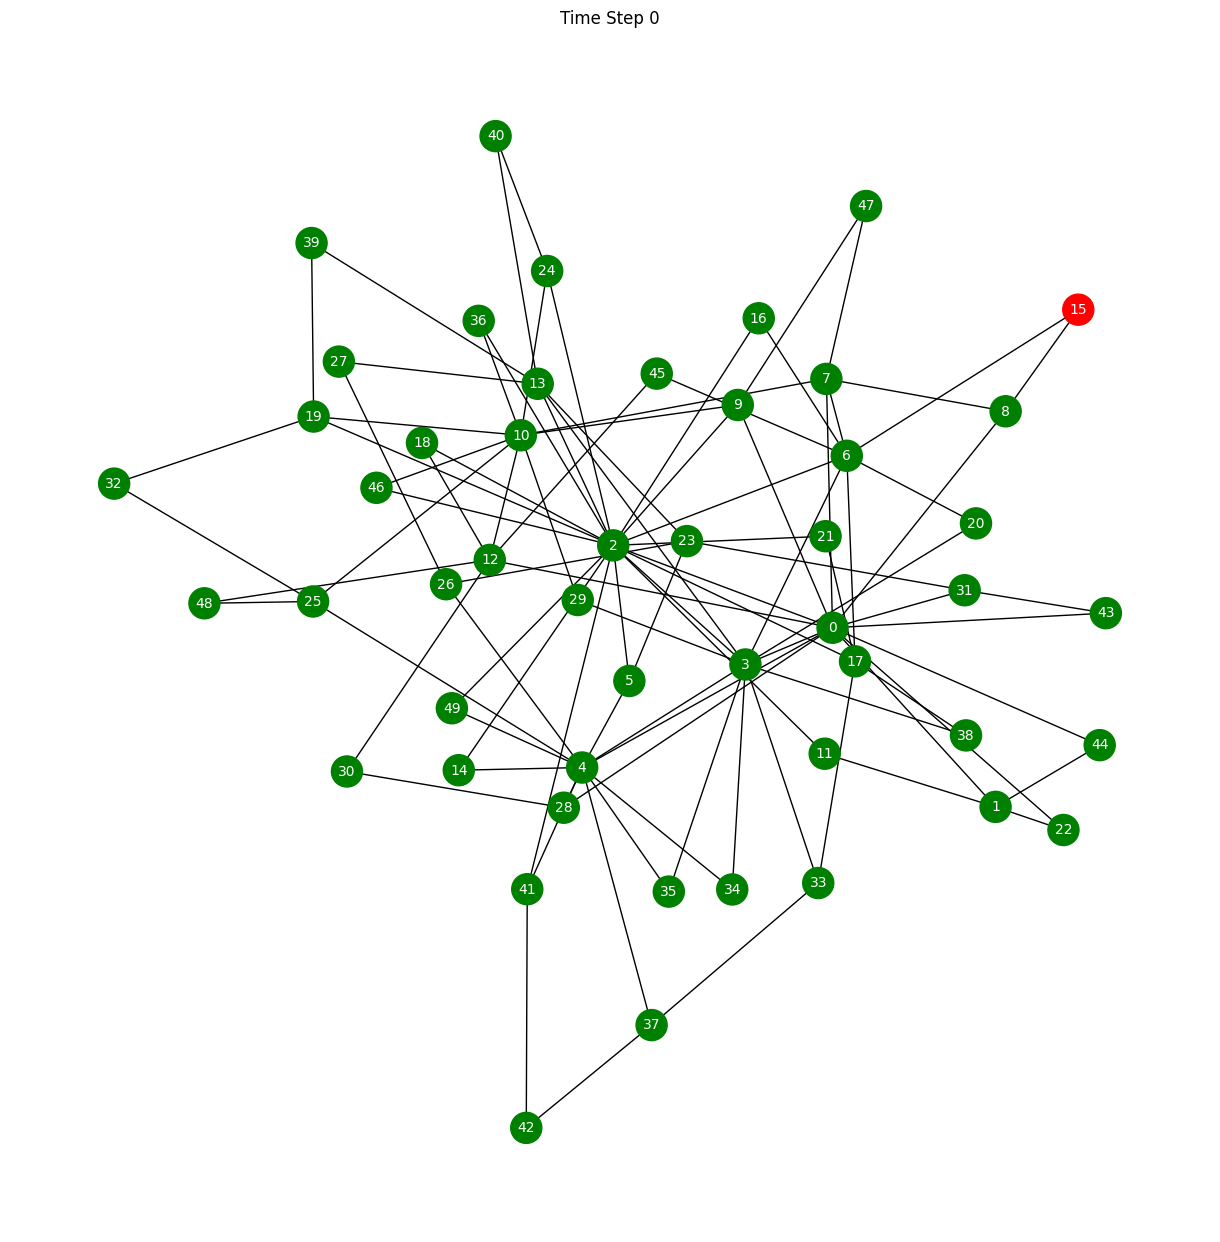

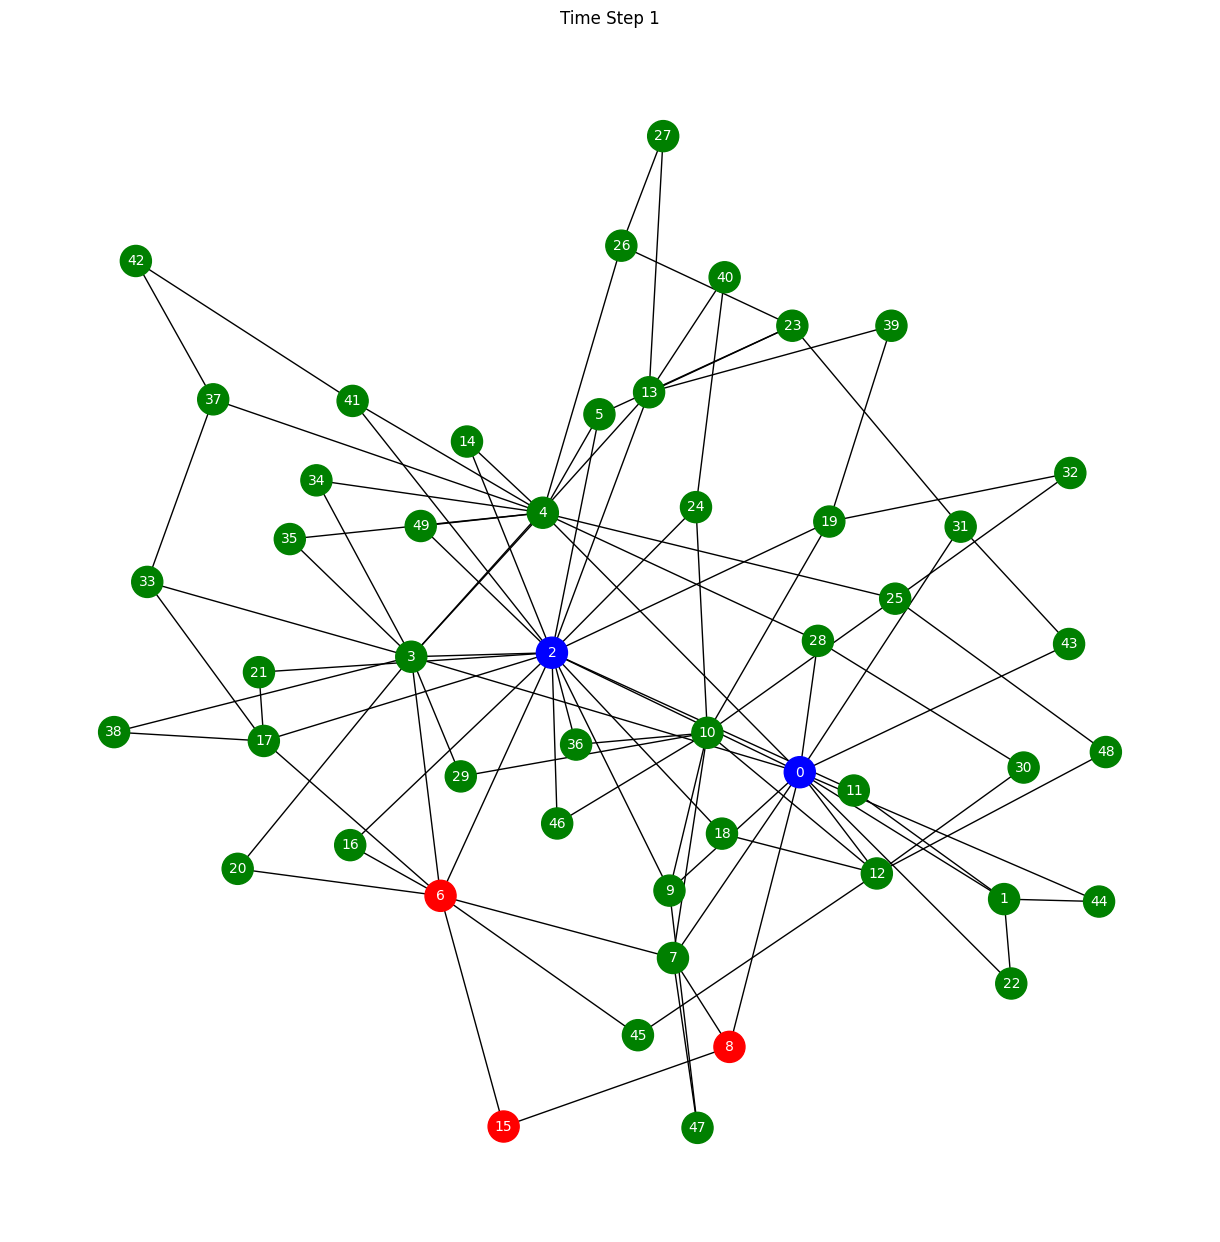

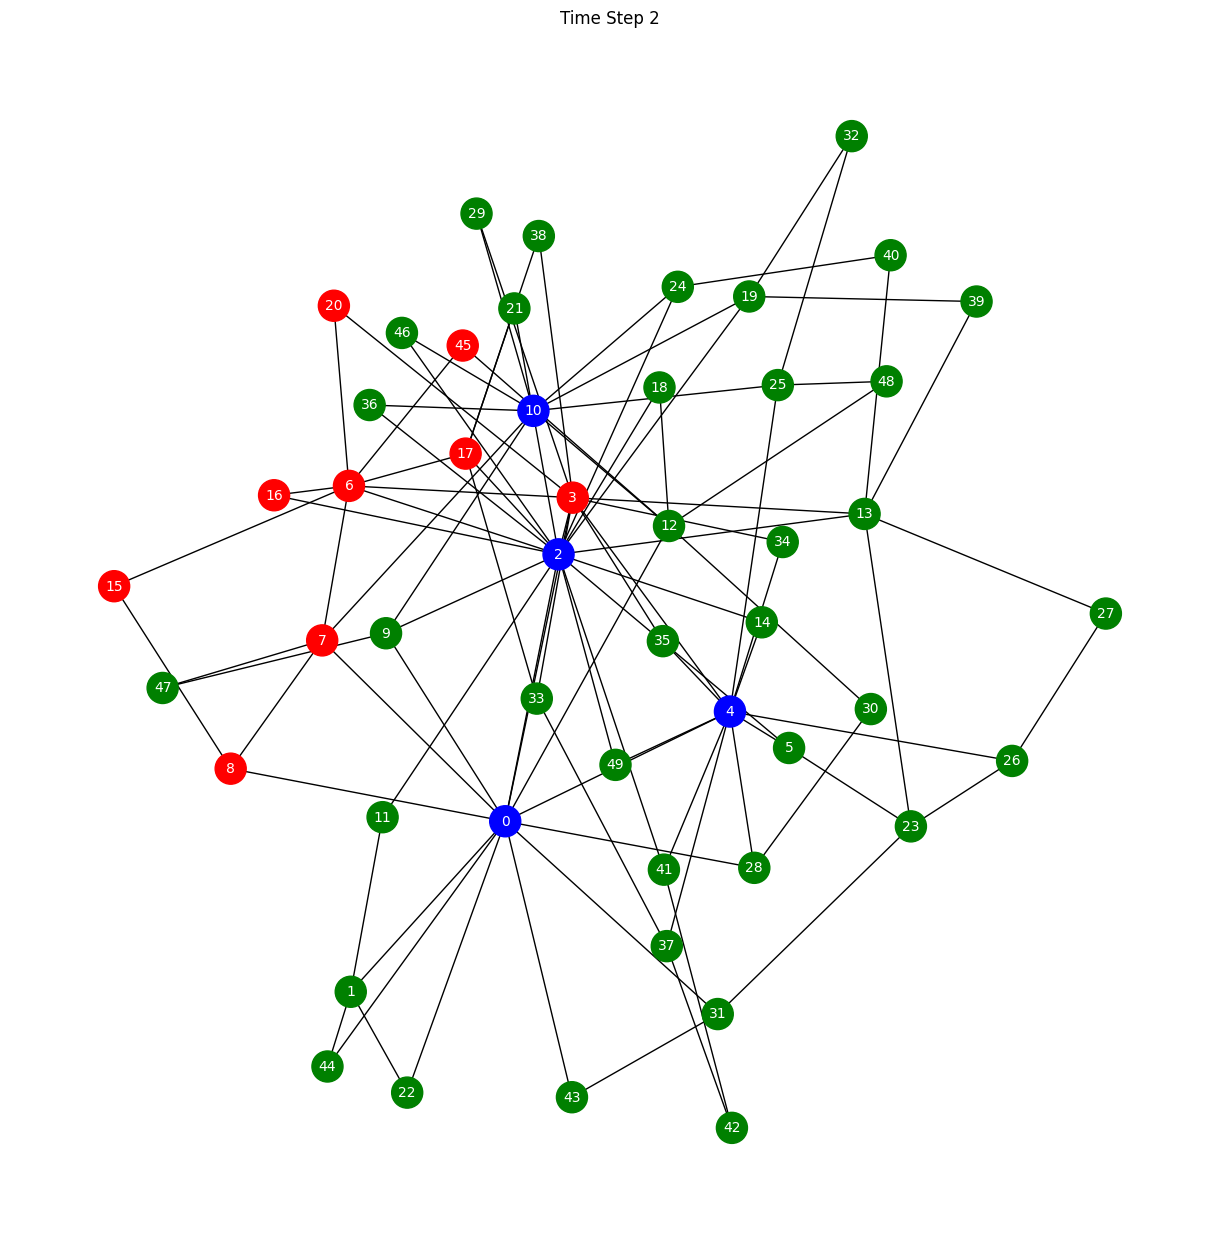

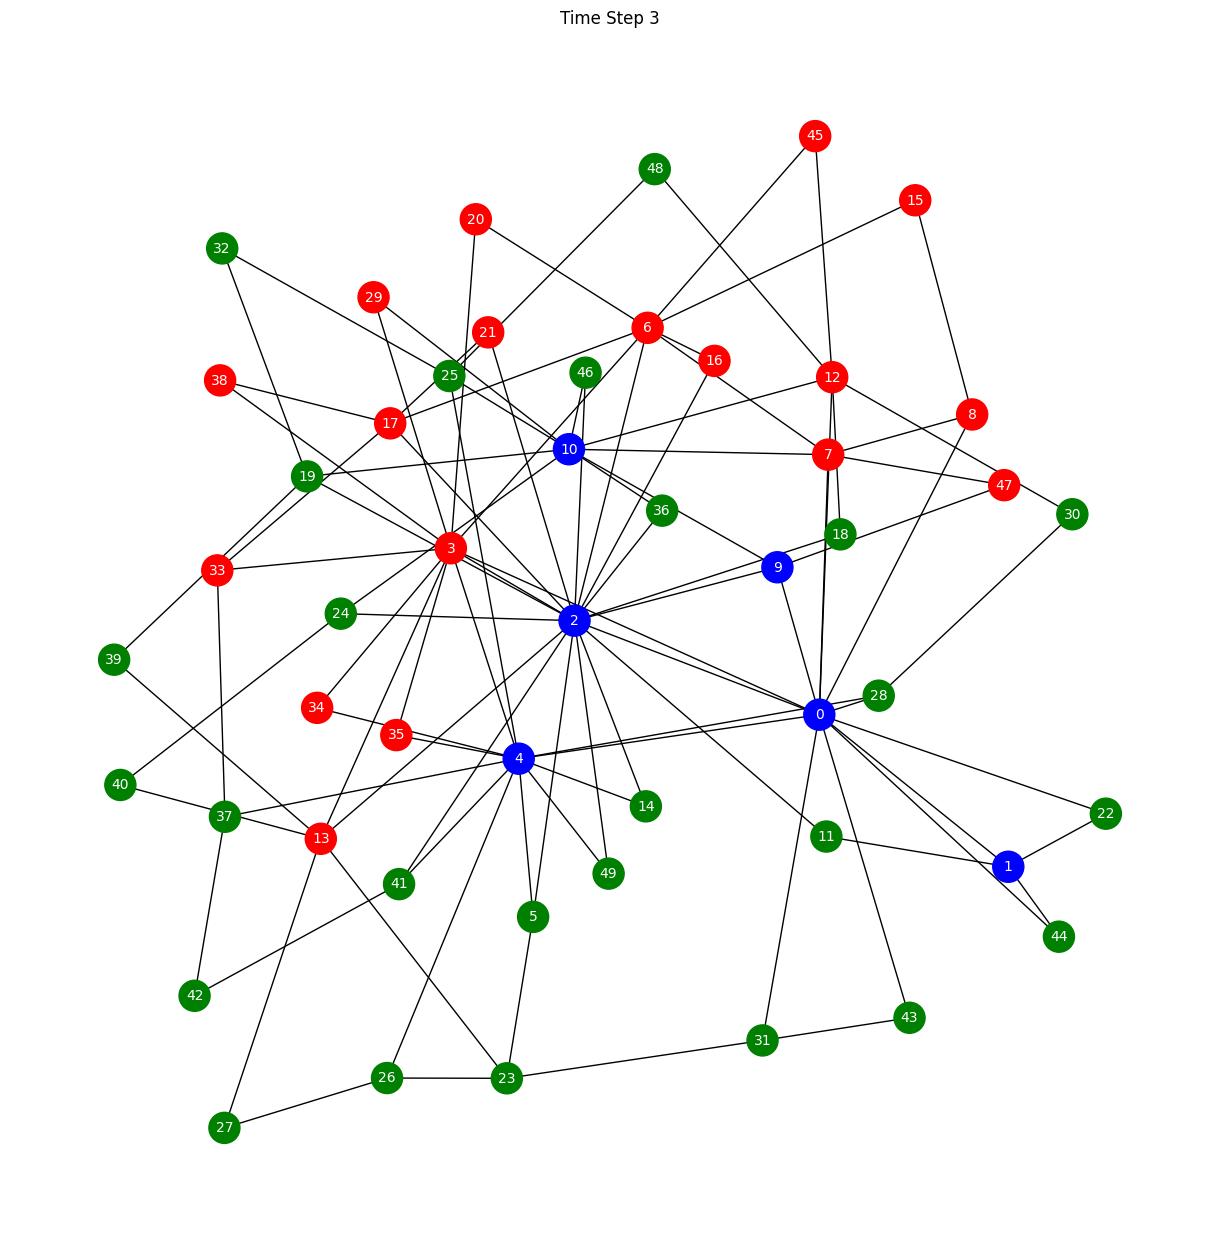

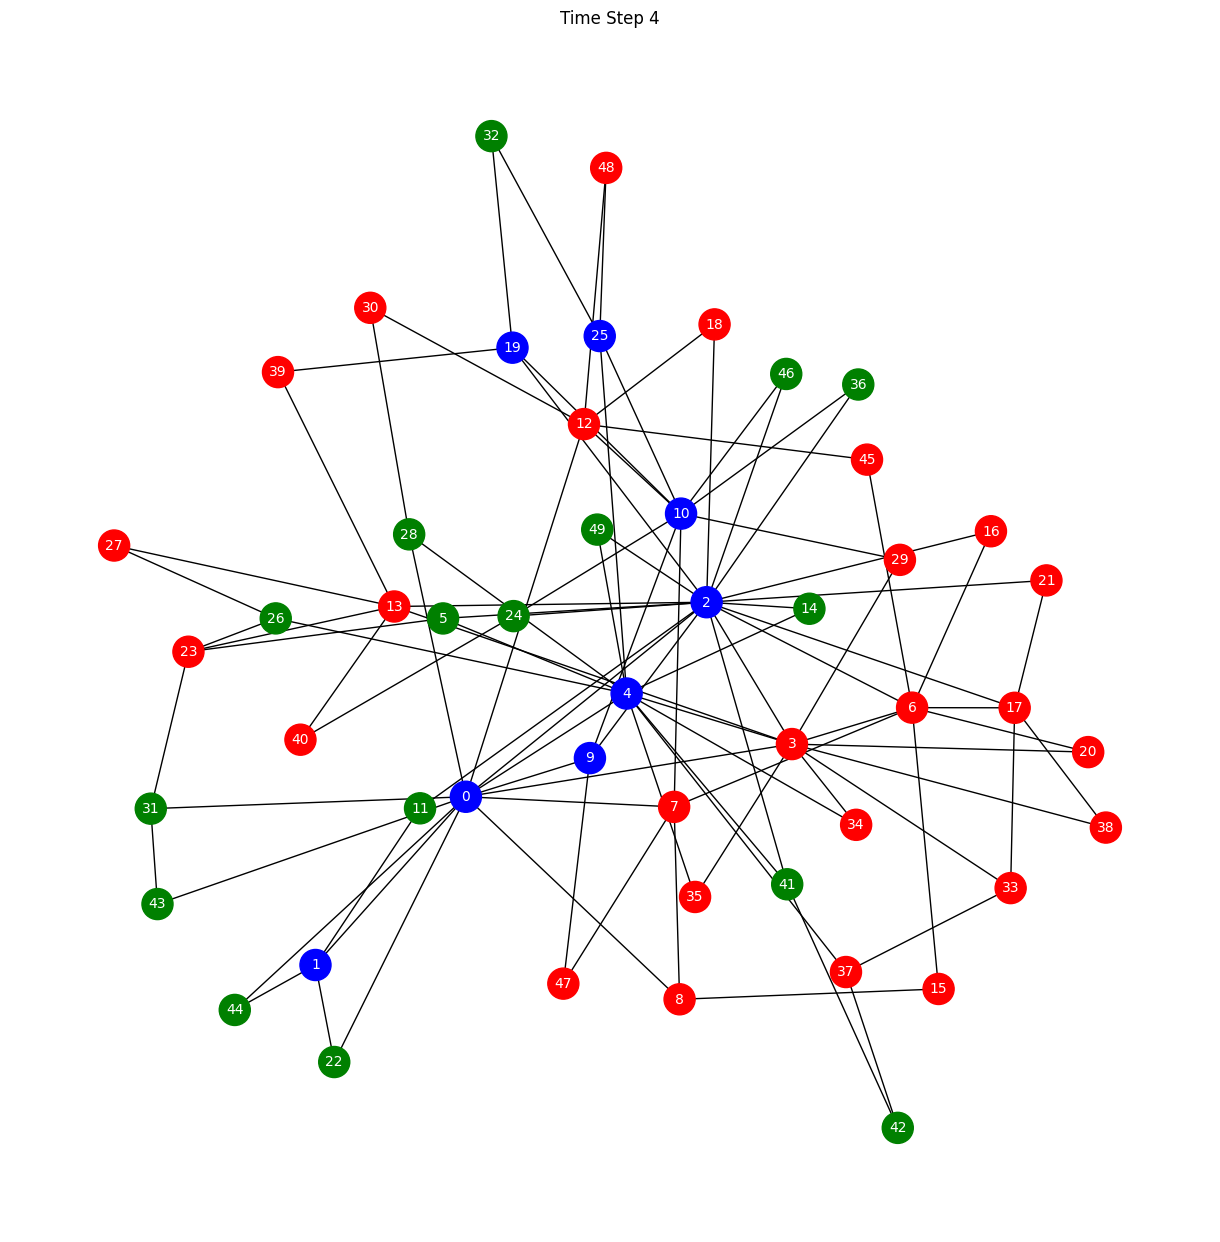

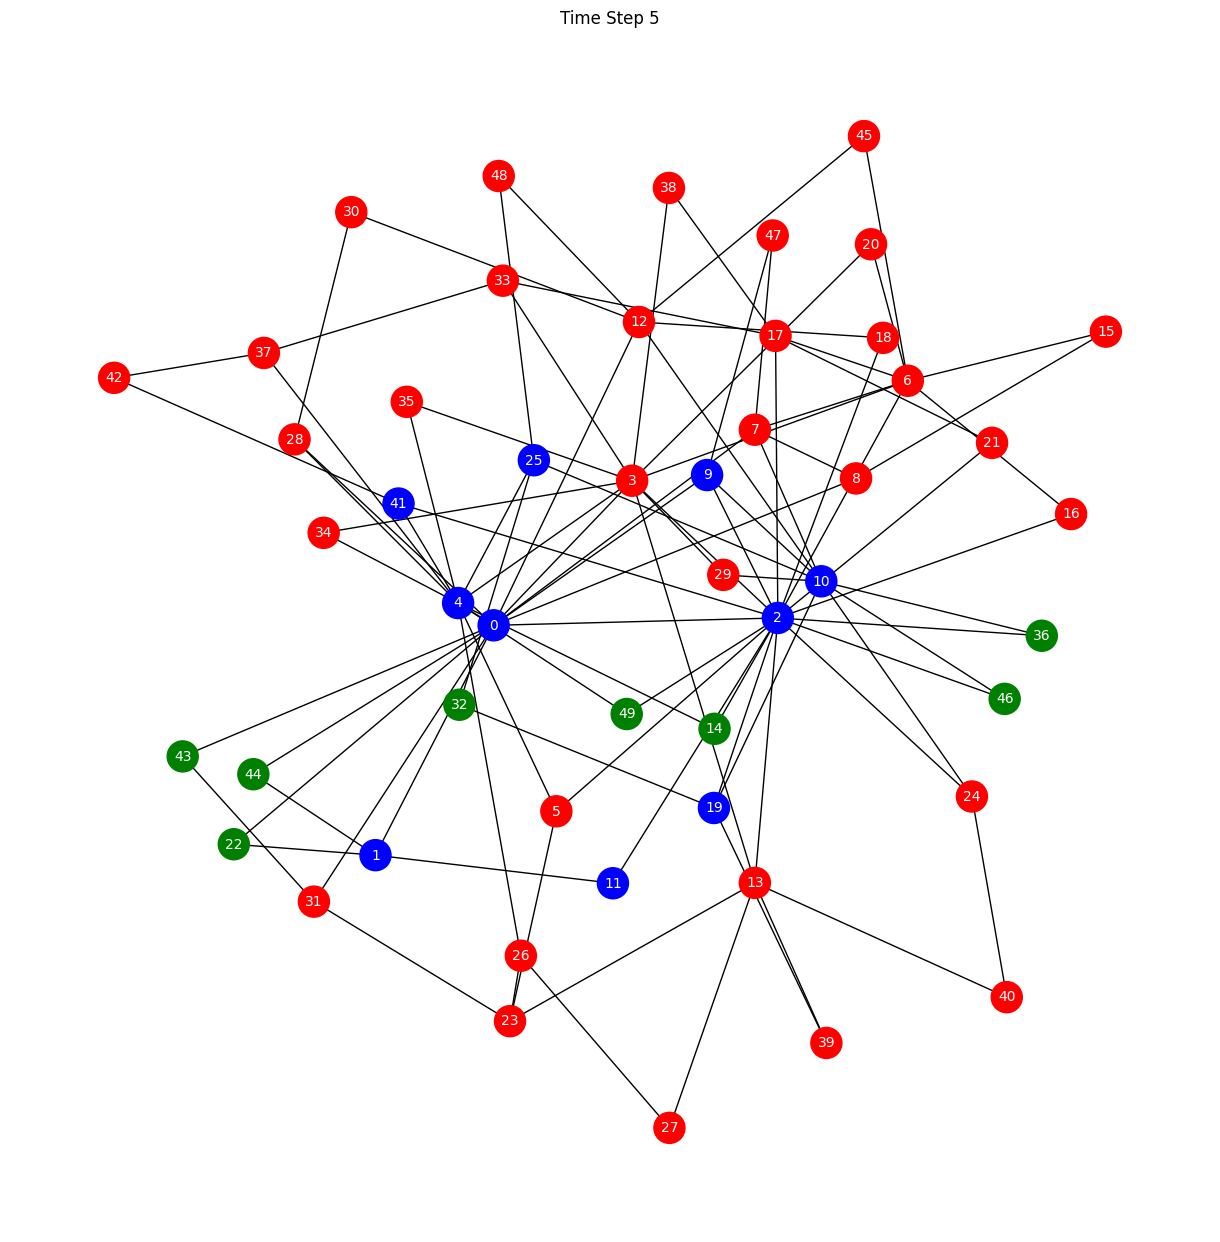

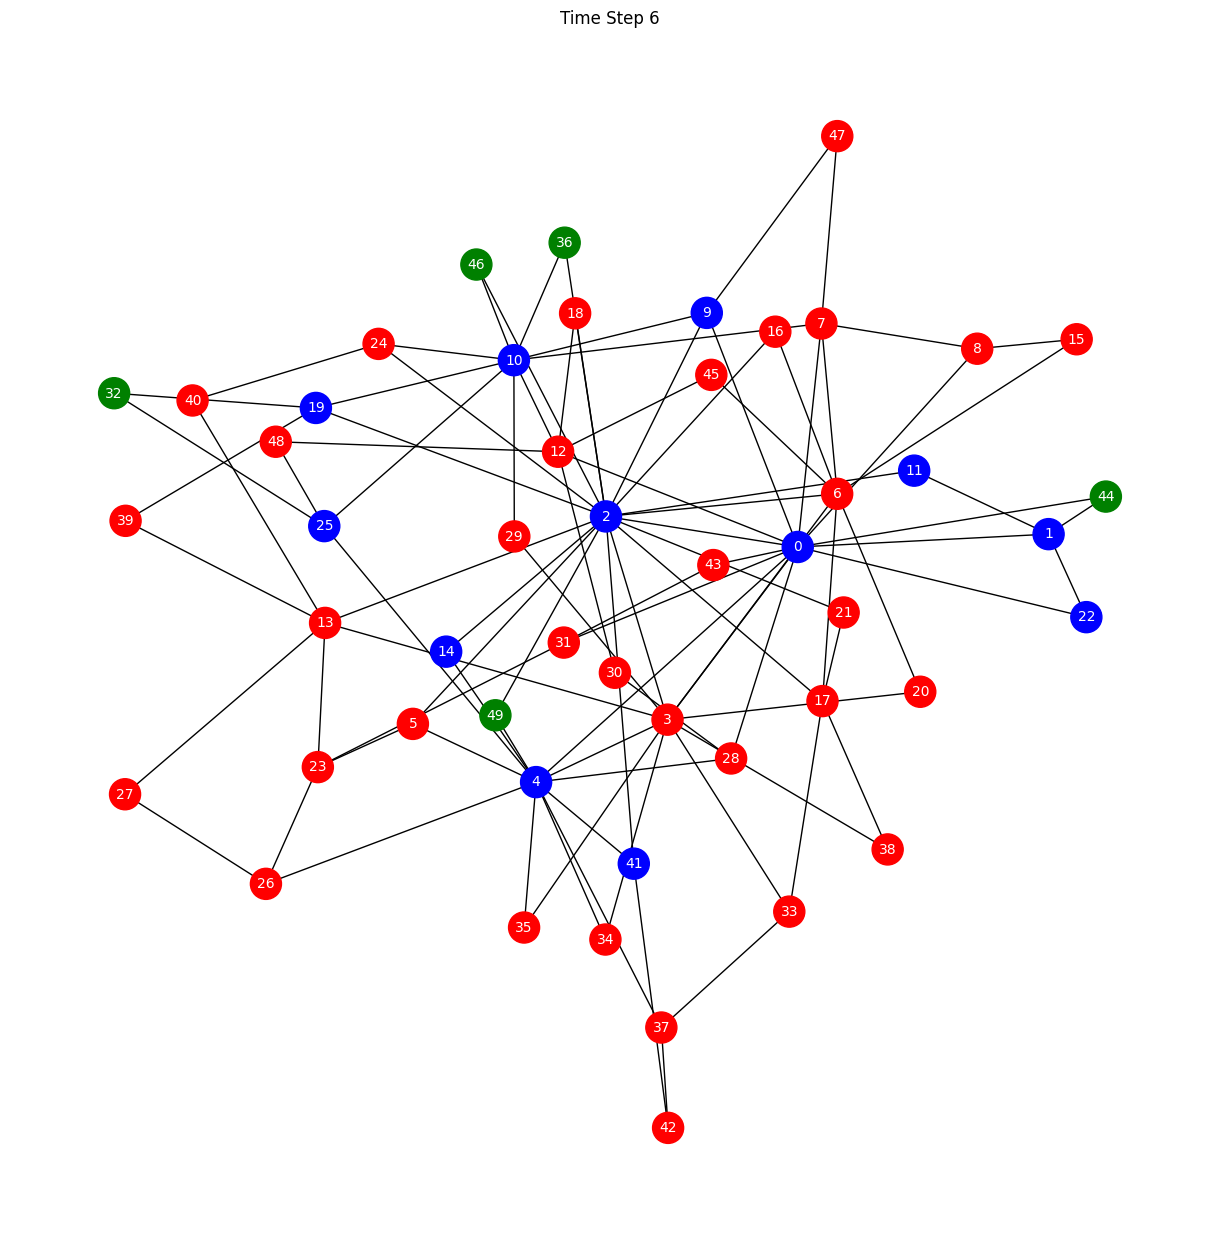

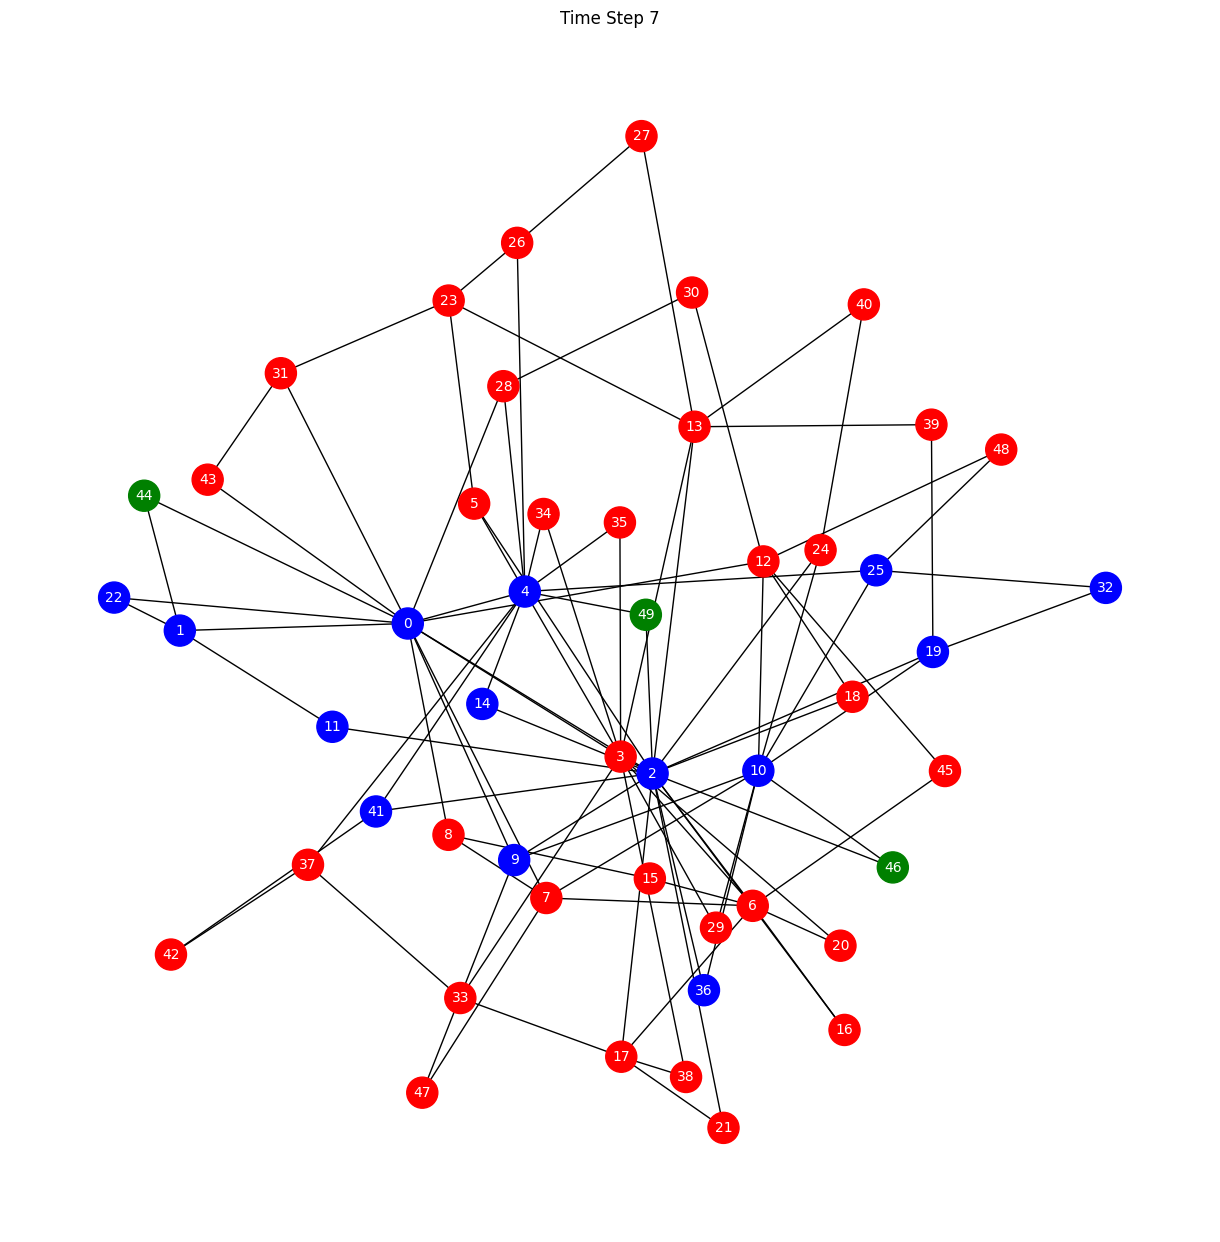

Final Protected Vertices: {0, 1, 2, 32, 4, 36, 9, 10, 41, 11, 14, 19, 22, 25}
Final Burning Vertices: {3, 5, 6, 7, 8, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 43, 45, 47, 48}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def visualize_graph(graph, burning, protected, time_step):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 12))
    
    node_colors = []
    for node in graph.nodes():
        if node in burning:
            node_colors.append('red')
        elif node in protected:
            node_colors.append('blue')
        else:
            node_colors.append('green')
    
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='white')
    plt.title(f"Time Step {time_step}")
    plt.show()

def firefighter_problem(graph, start_vertex, num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    visualize_graph(graph, burning, protected, time_step)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Prioritize protecting nodes based on their degree (connectivity)
        candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        visualize_graph(graph, burning, protected, time_step)

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    return protected, burning

# Example usage: Random graph with 30 nodes
# G = nx.gnp_random_graph(30, 0.2)

# Alternatively, you can use different graph structures:
# G = nx.grid_2d_graph(5, 6)  # Grid graph
# G = nx.cycle_graph(30)  # Cycle graph
G = nx.barabasi_albert_graph(50, 2)  # Barabási-Albert graph

# Select a random start vertex
start_vertex = random.choice(list(G.nodes))

protected, burning = firefighter_problem(G, start_vertex, num_firefighters=2)

print("Final Protected Vertices:", protected)
print("Final Burning Vertices:", burning)


In [5]:
import networkx as nx
import random

def firefighter_problem(graph, start_vertex, num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Prioritize protecting nodes based on their degree (connectivity)
        candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    saved_nodes = total_nodes - len(burning) - len(protected)
    percent_saved = (saved_nodes / total_nodes) * 100

    return time_step, percent_saved

# Example usage: Random graph with 30 nodes
# G = nx.gnp_random_graph(30, 0.1)

# Alternatively, you can use different graph structures:
# G = nx.grid_2d_graph(5, 6)  # Grid graph
# G = nx.cycle_graph(30)  # Cycle graph
# G = nx.barabasi_albert_graph(100, 2)  # Barabási-Albert graph

# Select a random start vertex
start_vertex = random.choice(list(G.nodes))

time_step, percent_saved = firefighter_problem(G, start_vertex, num_firefighters=2)

print(f"Fire contained at time step: {time_step}")
print(f"Percentage of graph saved: {percent_saved:.2f}%")


Fire contained at time step: 7
Percentage of graph saved: 22.00%


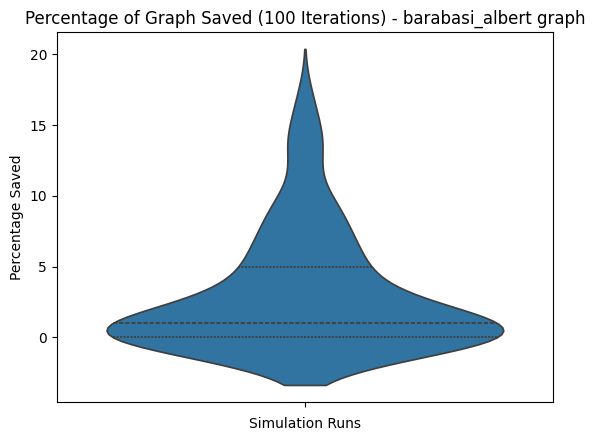

In [28]:
import networkx as nx
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def firefighter_problem(graph, start_vertex, num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Prioritize protecting nodes based on their degree (connectivity)
        candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    saved_nodes = total_nodes - len(burning) - len(protected)
    percent_saved = (saved_nodes / total_nodes) * 100

    return time_step, percent_saved

def run_simulations(graph_type, num_nodes, num_firefighters, num_iterations=100):
    time_steps = []
    percent_saved_list = []

    for _ in range(num_iterations):
        if graph_type == 'random':
            G = nx.gnp_random_graph(num_nodes, 0.1)
        elif graph_type == 'grid':
            side_length = int(num_nodes**0.5)
            G = nx.grid_2d_graph(side_length, side_length)
        elif graph_type == 'cycle':
            G = nx.cycle_graph(num_nodes)
        elif graph_type == 'barabasi_albert':
            G = nx.barabasi_albert_graph(num_nodes, 2)
        else:
            raise ValueError("Unsupported graph type")

        start_vertex = random.choice(list(G.nodes))
        time_step, percent_saved = firefighter_problem(G, start_vertex, num_firefighters)
        time_steps.append(time_step)
        percent_saved_list.append(percent_saved)

    return time_steps, percent_saved_list

# Parameters
num_nodes = 100
num_firefighters = 2
num_iterations = 100
graph_type = 'barabasi_albert'  # Change this to 'grid', 'cycle', or 'barabasi_albert' as needed

# Run simulations
time_steps, percent_saved_list = run_simulations(graph_type, num_nodes, num_firefighters, num_iterations)

# Generate violin plot
sns.violinplot(data=percent_saved_list, inner="quartile")
plt.title(f"Percentage of Graph Saved ({num_iterations} Iterations) - {graph_type} graph")
plt.xlabel("Simulation Runs")
plt.ylabel("Percentage Saved")
plt.show(

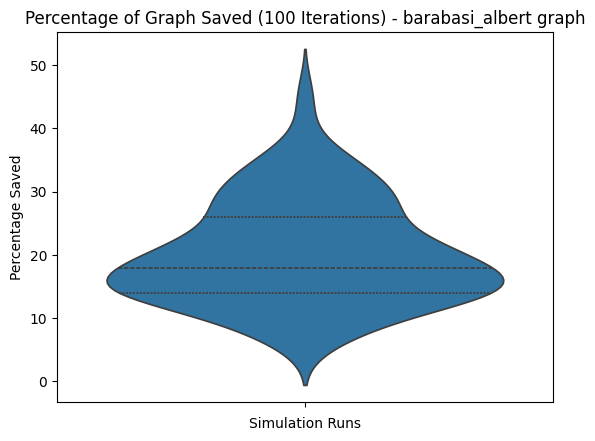

In [38]:
import networkx as nx
import random
import seaborn as sns
import matplotlib.pyplot as plt

def firefighter_problem(graph, start_vertex, num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Greedy protection strategy: prioritize nodes with the highest number of unprotected neighbors
        candidate_nodes = sorted(graph.nodes, key=lambda node: sum(1 for neighbor in graph.neighbors(node) if neighbor not in protected and neighbor not in burning), reverse=True)
        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    not_burning = set(graph.nodes) - burning
    percent_saved = (len(not_burning) / total_nodes) * 100

    return time_step, percent_saved

def run_simulations(graph_type, num_nodes, num_firefighters, num_iterations=100):
    time_steps = []
    percent_saved_list = []

    for _ in range(num_iterations):
        if graph_type == 'random':
            G = nx.gnp_random_graph(num_nodes, 0.1)
        elif graph_type == 'grid':
            side_length = int(num_nodes**0.5)
            G = nx.grid_2d_graph(side_length, side_length)
        elif graph_type == 'cycle':
            G = nx.cycle_graph(num_nodes)
        elif graph_type == 'barabasi_albert':
            G = nx.barabasi_albert_graph(num_nodes, 2)
        else:
            raise ValueError("Unsupported graph type")

        start_vertex = random.choice(list(G.nodes))
        time_step, percent_saved = firefighter_problem(G, start_vertex, num_firefighters)
        time_steps.append(time_step)
        percent_saved_list.append(percent_saved)

    return time_steps, percent_saved_list

# Parameters
num_nodes = 50
num_firefighters = 2
num_iterations = 100
graph_type = 'barabasi_albert'  # Change this to 'random, 'grid', 'cycle', or 'barabasi_albert' as needed

# Run simulations
time_steps, percent_saved_list = run_simulations(graph_type, num_nodes, num_firefighters, num_iterations)

# Generate violin plot
sns.violinplot(data=percent_saved_list, inner="quartile")
plt.title(f"Percentage of Graph Saved ({num_iterations} Iterations) - {graph_type} graph")
plt.xlabel("Simulation Runs")
plt.ylabel("Percentage Saved")
plt.show()


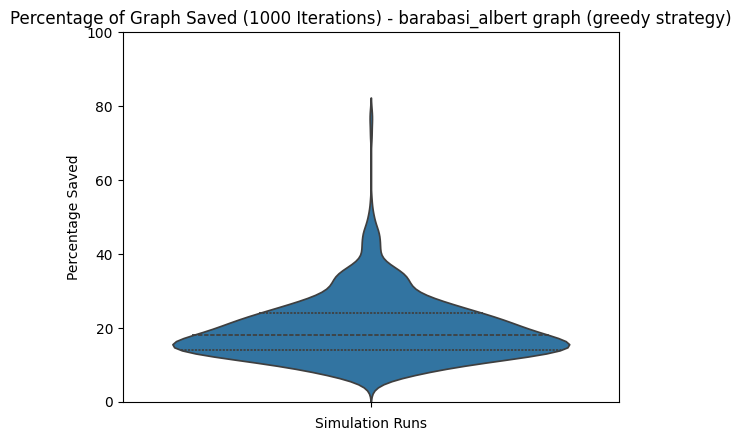

In [51]:
import networkx as nx
import random
import seaborn as sns
import matplotlib.pyplot as plt

def firefighter_problem(graph, start_vertex, strategy='greedy', num_firefighters=2):
    burning = set([start_vertex])
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Select protection strategy
        if strategy == 'greedy':
            # Greedy protection strategy: prioritize nodes with the highest number of unprotected neighbors
            candidate_nodes = sorted(graph.nodes, key=lambda node: sum(1 for neighbor in graph.neighbors(node) if neighbor not in protected and neighbor not in burning), reverse=True)
        elif strategy == 'node':
            # Node-based defense strategy: prioritize nodes based on their degree
            candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        elif strategy == 'random':
            # Random defense strategy: randomly select nodes to protect
            candidate_nodes = list(graph.nodes)
            random.shuffle(candidate_nodes)
        else:
            raise ValueError("Unsupported strategy type")

        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    not_burning = set(graph.nodes) - burning
    percent_saved = (len(not_burning) / total_nodes) * 100

    return time_step, percent_saved

def run_simulations(graph_type, num_nodes, strategy, num_firefighters, num_iterations=100):
    time_steps = []
    percent_saved_list = []

    for _ in range(num_iterations):
        if graph_type == 'random':
            G = nx.gnp_random_graph(num_nodes, 0.1)
        elif graph_type == 'grid':
            side_length = int(num_nodes**0.5)
            G = nx.grid_2d_graph(side_length, side_length)
        elif graph_type == 'cycle':
            G = nx.cycle_graph(num_nodes)
        elif graph_type == 'barabasi_albert':
            G = nx.barabasi_albert_graph(num_nodes, 2)
        else:
            raise ValueError("Unsupported graph type")

        start_vertex = random.choice(list(G.nodes))
        time_step, percent_saved = firefighter_problem(G, start_vertex, strategy, num_firefighters)
        time_steps.append(time_step)
        percent_saved_list.append(percent_saved)

    return time_steps, percent_saved_list

# Parameters
num_nodes = 50
num_firefighters = 2
num_iterations = 1000
graph_type = 'barabasi_albert'  # Change this to 'grid', 'cycle', or 'barabasi_albert' as needed
strategy = 'greedy'  # Change this to 'greedy', 'node', or 'random' for different strategies

# Run simulations
time_steps, percent_saved_list = run_simulations(graph_type, num_nodes, strategy, num_firefighters, num_iterations)

# Generate violin plot
sns.violinplot(data=percent_saved_list, inner="quartile")
plt.title(f"Percentage of Graph Saved ({num_iterations} Iterations) - {graph_type} graph ({strategy} strategy)")
plt.xlabel("Simulation Runs")
plt.ylabel("Percentage Saved")
plt.ylim(0, 100)

plt.show()



Initial fires at vertices: [18]
Fire contained at time step: 6
Percentage of graph saved: 10.00%
Percentage of graph saved + protected: 20.00%


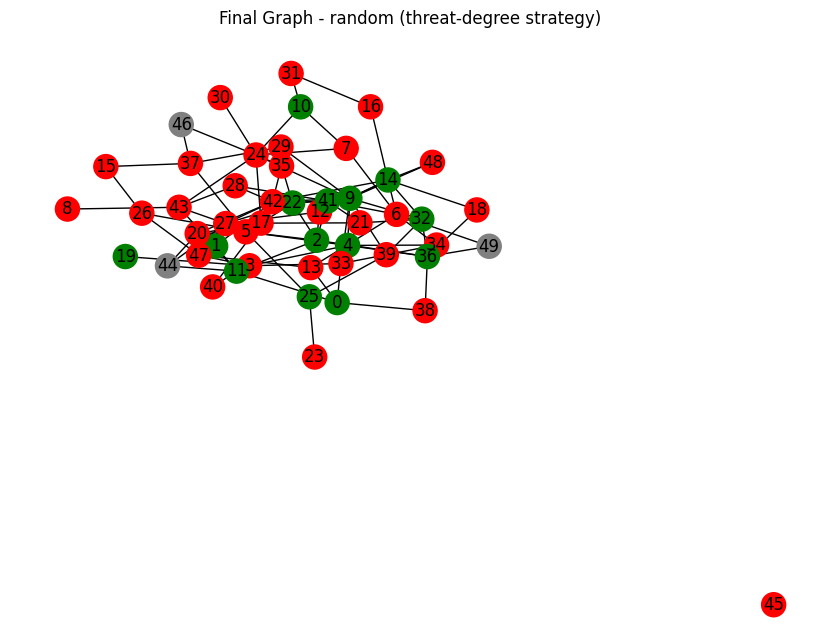

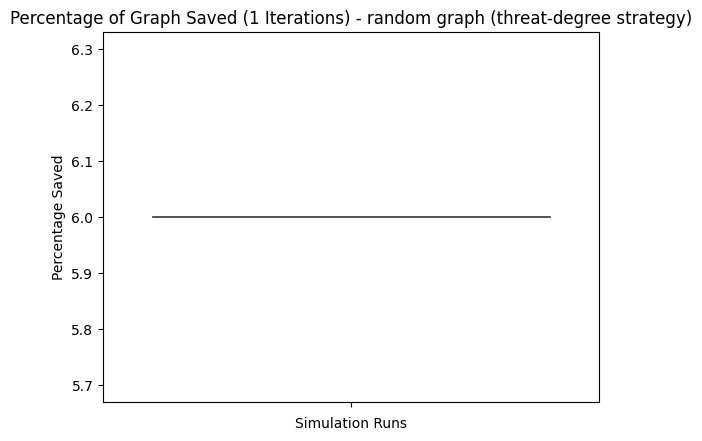

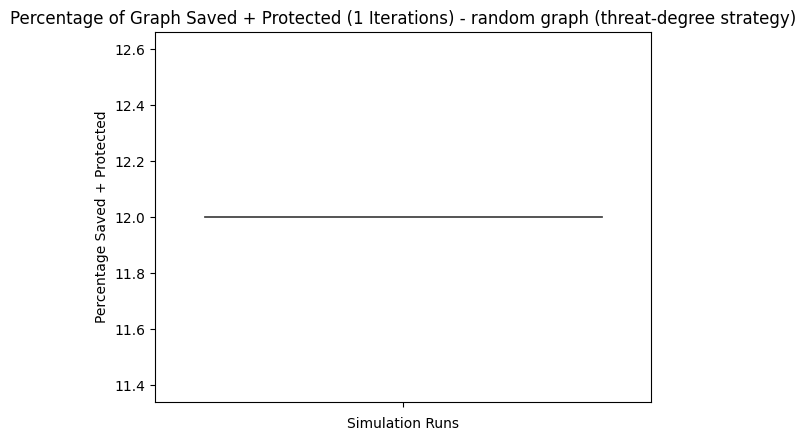

In [45]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def firefighter_problem(graph, start_vertices, strategy='degree', num_firefighters=2):
    burning = set(start_vertices)
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)

    while burning:
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        # Select protection strategy
        if strategy == 'random':
            candidate_nodes = list(graph.nodes)
            random.shuffle(candidate_nodes)
        elif strategy == 'threat':
            candidate_nodes = sorted(graph.nodes, key=lambda node: sum(1 for neighbor in graph.neighbors(node) if neighbor in burning), reverse=True)
        elif strategy == 'degree':
            candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        elif strategy == 'threat-degree':
            candidate_nodes = sorted(graph.nodes, key=lambda node: (sum(1 for neighbor in graph.neighbors(node) if neighbor in burning), graph.degree[node]), reverse=True)
        else:
            raise ValueError("Unsupported strategy type")

        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    not_burning = set(graph.nodes) - burning
    percent_saved_protected = ((len(not_burning) + len(protected)) / total_nodes) * 100
    percent_saved = (len(not_burning) / total_nodes) * 100

    return time_step, percent_saved, percent_saved_protected

def run_simulations(graph_type, num_nodes, strategy, num_firefighters, num_initial_fires, num_iterations=100):
    time_steps = []
    percent_saved_list = []
    percent_saved_protected_list = []

    for _ in range(num_iterations):
        if graph_type == 'random':
            G = nx.gnp_random_graph(num_nodes, 0.1)
        elif graph_type == 'grid':
            side_length = int(num_nodes**0.5)
            G = nx.grid_2d_graph(side_length, side_length)
        elif graph_type == 'cycle':
            G = nx.cycle_graph(num_nodes)
        elif graph_type == 'barabasi_albert':
            G = nx.barabasi_albert_graph(num_nodes, 3)
        else:
            raise ValueError("Unsupported graph type")

        start_vertices = random.sample(list(G.nodes), num_initial_fires)
        time_step, percent_saved, percent_saved_protected = firefighter_problem(G, start_vertices, strategy, num_firefighters)
        time_steps.append(time_step)
        percent_saved_list.append(percent_saved)
        percent_saved_protected_list.append(percent_saved_protected)

    return time_steps, percent_saved_list, percent_saved_protected_list

# Parameters
num_nodes = 50
num_firefighters = 1
num_iterations = 1
num_initial_fires = 1
graph_type = 'random'  # Change this to 'grid', 'cycle', or 'barabasi_albert' as needed
strategy = 'threat-degree'  # Change this to 'random', 'threat', 'degree', or 'threat-degree' for different strategies

# Run simulations
time_steps, percent_saved_list, percent_saved_protected_list = run_simulations(graph_type, num_nodes, strategy, num_firefighters, num_initial_fires, num_iterations)

# Print results of one example simulation
start_vertices = random.sample(list(nx.gnp_random_graph(num_nodes, 0.1).nodes), num_initial_fires)
G = nx.gnp_random_graph(num_nodes, 0.1)
time_step, percent_saved, percent_saved_protected = firefighter_problem(G, start_vertices, strategy, num_firefighters)

print(f"Initial fires at vertices: {start_vertices}")
print(f"Fire contained at time step: {time_step}")
print(f"Percentage of graph saved: {percent_saved:.2f}%")
print(f"Percentage of graph saved + protected: {percent_saved_protected:.2f}%")

# Draw the final graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['red' if node in burning else 'green' if node in protected else 'grey' for node in G.nodes])
plt.title(f"Final Graph - {graph_type} ({strategy} strategy)")
plt.show()

# Generate violin plot for percent saved and protected
sns.violinplot(data=percent_saved_list, inner="quartile")
plt.title(f"Percentage of Graph Saved ({num_iterations} Iterations) - {graph_type} graph ({strategy} strategy)")
plt.xlabel("Simulation Runs")
plt.ylabel("Percentage Saved")
plt.show()

sns.violinplot(data=percent_saved_protected_list, inner="quartile")
plt.title(f"Percentage of Graph Saved + Protected ({num_iterations} Iterations) - {graph_type} graph ({strategy} strategy)")
plt.xlabel("Simulation Runs")
plt.ylabel("Percentage Saved + Protected")
plt.show()


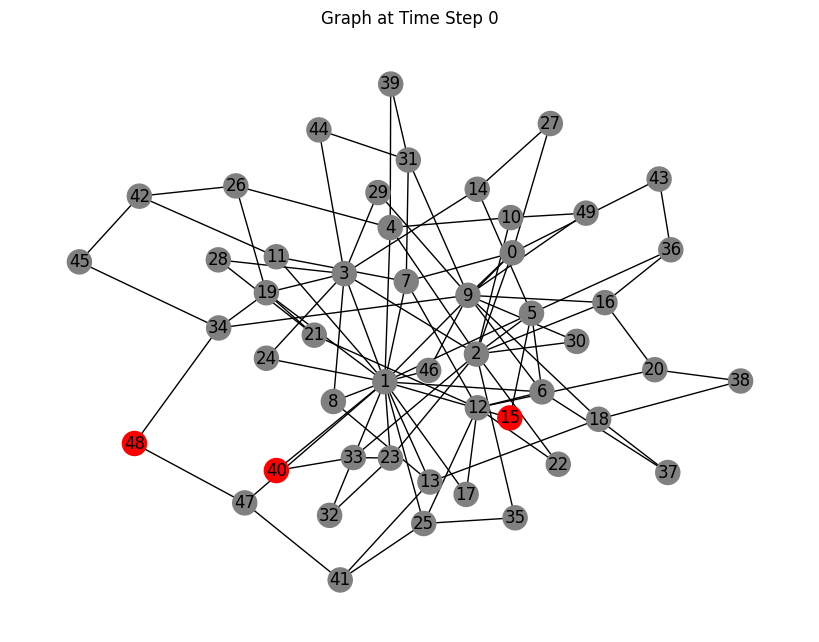

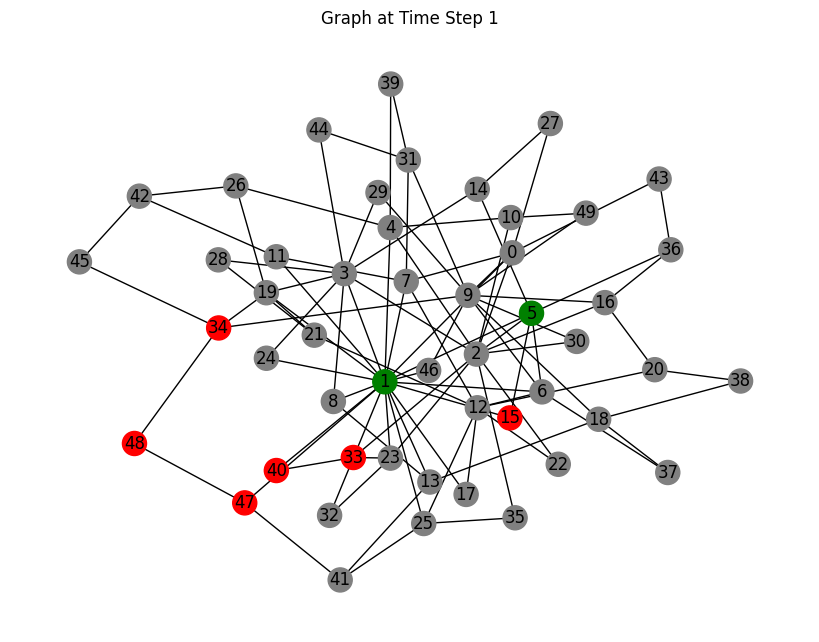

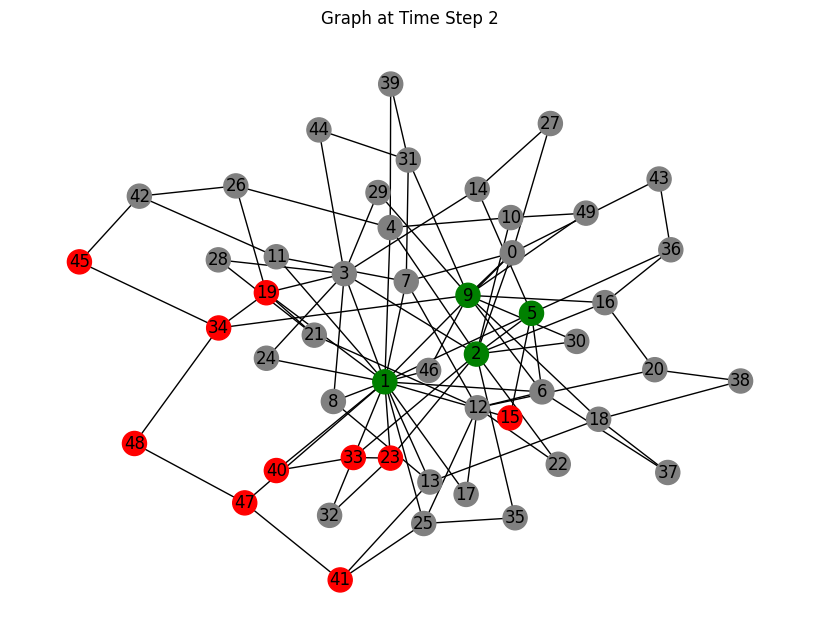

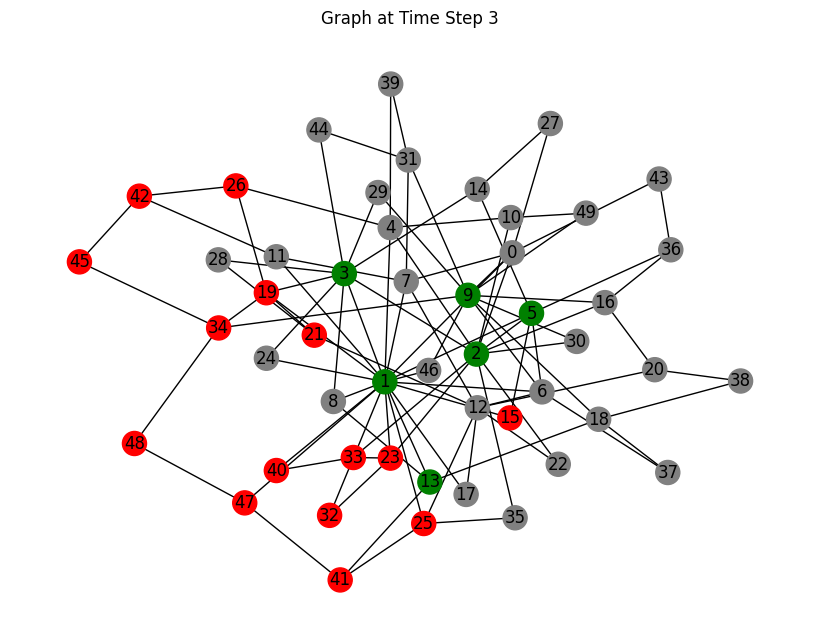

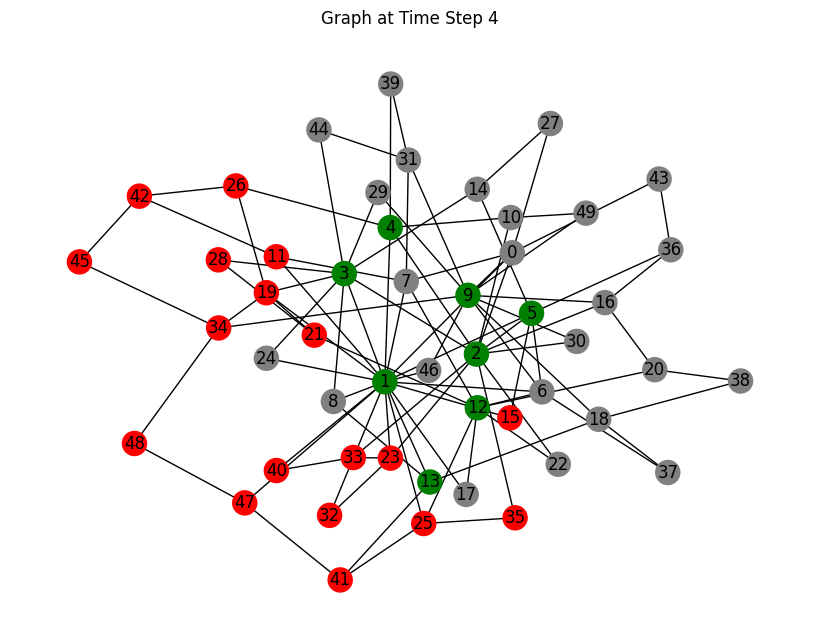

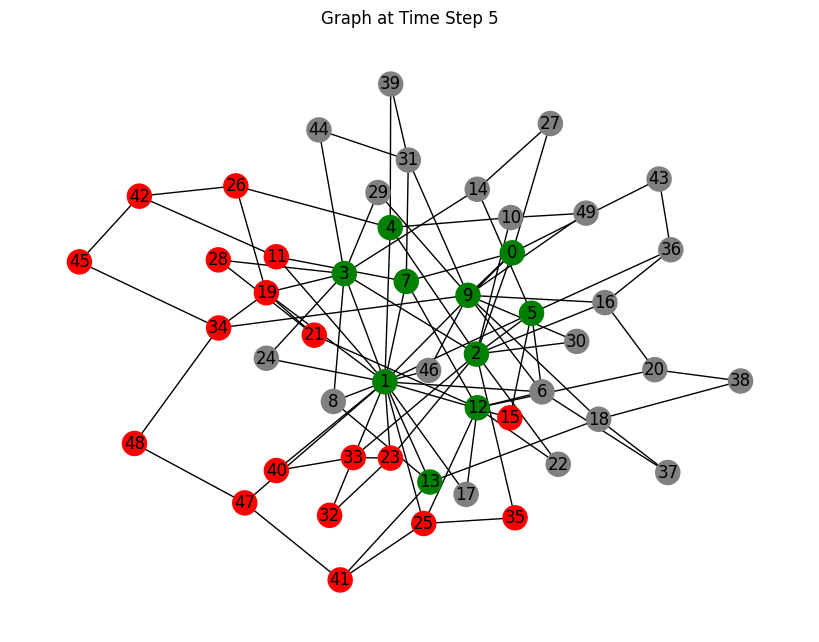

Initial fires at vertices: [40, 15, 48]
Fire contained at time step: 5
Percentage of graph saved: 64.00%


In [50]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def draw_graph(graph, burning, protected, pos, time_step):
    plt.figure(figsize=(8, 6))
    node_colors = ['red' if node in burning else 'green' if node in protected else 'grey' for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_color=node_colors)
    plt.title(f"Graph at Time Step {time_step}")
    plt.show()

def firefighter_problem(graph, start_vertices, strategy='degree', num_firefighters=2):
    burning = set(start_vertices)
    protected = set()
    time_step = 0

    total_nodes = len(graph.nodes)
    pos = nx.spring_layout(graph)

    while burning:
        draw_graph(graph, burning, protected, pos, time_step)

        # Select protection strategy
        if strategy == 'random':
            candidate_nodes = list(graph.nodes)
            random.shuffle(candidate_nodes)
        elif strategy == 'threat':
            candidate_nodes = sorted(graph.nodes, key=lambda node: sum(1 for neighbor in graph.neighbors(node) if neighbor in burning), reverse=True)
        elif strategy == 'degree':
            candidate_nodes = sorted(graph.nodes, key=lambda node: graph.degree[node], reverse=True)
        elif strategy == 'threat-degree':
            candidate_nodes = sorted(graph.nodes, key=lambda node: (sum(1 for neighbor in graph.neighbors(node) if neighbor in burning), graph.degree[node]), reverse=True)
        else:
            raise ValueError("Unsupported strategy type")

        new_protected = set()
        for node in candidate_nodes:
            if node not in protected and node not in burning:
                new_protected.add(node)
                if len(new_protected) == num_firefighters:
                    break

        protected.update(new_protected)
        
        new_burning = set()
        for vertex in burning:
            for neighbor in graph.neighbors(vertex):
                if neighbor not in burning and neighbor not in protected:
                    new_burning.add(neighbor)
        burning.update(new_burning)

        time_step += 1

        # If no new burning vertices, break the loop
        if not new_burning:
            break

    draw_graph(graph, burning, protected, pos, time_step)
    
    not_burning = set(graph.nodes) - burning
    percent_saved_protected = ((len(not_burning) + len(protected)) / total_nodes) * 100
    percent_saved = (len(not_burning) / total_nodes) * 100

    return time_step, percent_saved, percent_saved_protected

def get_average_degree_centrality_node(graph):
    degree_centrality = nx.degree_centrality(graph)
    avg_centrality = np.mean(list(degree_centrality.values()))
    
    # Find the node with centrality closest to the average
    closest_node = min(degree_centrality.keys(), key=lambda node: abs(degree_centrality[node] - avg_centrality))
    
    return closest_node


# Example usage: Random graph with 50 nodes
G = nx.barabasi_albert_graph(50, 2)
start_vertices = random.sample(list(G.nodes), 3) # get_average_degree_centrality_node(G)

time_step, percent_saved, percent_saved_protected = firefighter_problem(G, start_vertices, strategy='threat-degree', num_firefighters=2)

print(f"Initial fires at vertices: {start_vertices}")
print(f"Fire contained at time step: {time_step}")
print(f"Percentage of graph saved: {percent_saved:.2f}%")
#print(f"Percentage of graph saved + protected: {percent_saved_protected:.2f}%")
